# Восстановление золота из руды

Подготовим прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используем данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

## Этапы выполнения проекта:

1. Подготка данных
- Откроем файлы и изучим их.
- Проанализируем признаки, недоступные в тестовой выборке. 
- Проверим, что эффективность обогащения рассчитана правильно. 
- Проведем предобработку данных.
- Проверим корреляцию целевых признаков с признаками из обучающего набора
- Проверим признаки из обучающего набора на мультиколлинеарность
2. Анализ данных
- Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. 
- Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. (Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.)
- Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.
3. Построим модель
- Напишем функцию для вычисления итоговой sMAPE (cимметричная средняя абсолютная ошибка в процентах) - метрики качества для нашей модели.
- Обучим разные модели и оценим их качество кросс-валидацией. Выберем лучшую модель и проверим её на тестовой выборке. 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Этапы-выполнения-проекта:" data-toc-modified-id="Этапы-выполнения-проекта:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Этапы выполнения проекта:</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Исходные-данные" data-toc-modified-id="Исходные-данные-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Исходные данные</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Признаки,-недоступные-в-тестовой-выборке" data-toc-modified-id="Признаки,-недоступные-в-тестовой-выборке-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Признаки, недоступные в тестовой выборке</a></span></li><li><span><a href="#Проверка-эффективности-обогащения" data-toc-modified-id="Проверка-эффективности-обогащения-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Проверка эффективности обогащения</a></span></li><li><span><a href="#Предобработка-данных:" data-toc-modified-id="Предобработка-данных:-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Предобработка данных:</a></span></li></ul></li><li><span><a href="#Functions_viz" data-toc-modified-id="Functions_viz-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Functions_viz</a></span><ul class="toc-item"><li><span><a href="#Корреляция-целевых-признаков-с-признаками-из-обучающего-набора" data-toc-modified-id="Корреляция-целевых-признаков-с-признаками-из-обучающего-набора-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Корреляция целевых признаков с признаками из обучающего набора</a></span></li><li><span><a href="#Проверка-признаков-на-мультиколлинеарность" data-toc-modified-id="Проверка-признаков-на-мультиколлинеарность-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Проверка признаков на мультиколлинеарность</a></span><ul class="toc-item"><li><span><a href="#Мультиколлинеарность-признаков-из-primary_cleaner.state." data-toc-modified-id="Мультиколлинеарность-признаков-из-primary_cleaner.state.-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Мультиколлинеарность признаков из primary_cleaner.state.</a></span></li><li><span><a href="#Мультиколлинеарность-признаков-из-rougher.input." data-toc-modified-id="Мультиколлинеарность-признаков-из-rougher.input.-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Мультиколлинеарность признаков из rougher.input.</a></span></li><li><span><a href="#Мультиколлинеарность-признаков-из-rougher.state." data-toc-modified-id="Мультиколлинеарность-признаков-из-rougher.state.-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Мультиколлинеарность признаков из rougher.state.</a></span></li><li><span><a href="#Мультиколлинеарность-признаков-из-secondary_cleaner.state" data-toc-modified-id="Мультиколлинеарность-признаков-из-secondary_cleaner.state-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>Мультиколлинеарность признаков из secondary_cleaner.state</a></span></li></ul></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Концентрация-металлов-на-различных-этапах-очистки." data-toc-modified-id="Концентрация-металлов-на-различных-этапах-очистки.-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Концентрация металлов на различных этапах очистки.</a></span></li><li><span><a href="#Распределение-размеров-гранул-сырья" data-toc-modified-id="Распределение-размеров-гранул-сырья-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Распределение размеров гранул сырья</a></span></li><li><span><a href="#Суммарная-концентрация-всех-веществ" data-toc-modified-id="Суммарная-концентрация-всех-веществ-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Суммарная концентрация всех веществ</a></span></li></ul></li><li><span><a href="#Модели" data-toc-modified-id="Модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Модели</a></span><ul class="toc-item"><li><span><a href="#Функция-для-вычисления-sMAPE." data-toc-modified-id="Функция-для-вычисления-sMAPE.-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Функция для вычисления sMAPE.</a></span></li><li><span><a href="#Оценка-выборок" data-toc-modified-id="Оценка-выборок-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Оценка выборок</a></span></li><li><span><a href="#Масштабирование-признаков" data-toc-modified-id="Масштабирование-признаков-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Масштабирование признаков</a></span></li><li><span><a href="#Модель-линейной-регрессии" data-toc-modified-id="Модель-линейной-регрессии-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Модель линейной регрессии</a></span></li><li><span><a href="#Модель-решающего-дерева" data-toc-modified-id="Модель-решающего-дерева-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Модель решающего дерева</a></span></li><li><span><a href="#Модель-случайного-леса" data-toc-modified-id="Модель-случайного-леса-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Модель случайного леса</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#Проверка-модели-на-адекватность" data-toc-modified-id="Проверка-модели-на-адекватность-5.7.1"><span class="toc-item-num">5.7.1&nbsp;&nbsp;</span>Проверка модели на адекватность</a></span></li></ul></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

## Подготовка данных

Загрузим необходимые для работы библиотеки.

In [1]:
!pip install sidetable -q

In [2]:
import pandas as pd
import numpy as np
from numpy.random import RandomState

import sidetable

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import make_scorer

from sklearn.pipeline import Pipeline

from sklearn.dummy import DummyRegressor

In [3]:
import warnings
warnings.filterwarnings("ignore")

Данные находятся в трёх файлах:

- `gold_recovery_train_new.csv` — обучающая выборка;
- `gold_recovery_test_new.csv` — тестовая выборка;
- `gold_recovery_full_new.csv` — исходные данные.

Данные индексируются датой и временем получения информации (признак `date`). Соседние по времени параметры часто похожи.

Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.

Исходный датасет содержит обучающую и тестовую выборки со всеми признаками.

В нашем распоряжении сырые данные: их просто выгрузили из хранилища. Прежде чем приступить к построению модели, проверим их на корректность.

Создаем путь к файлам с данными.

In [4]:
path_train = '/datasets/gold_recovery_train_new.csv'
path_test = '/datasets/gold_recovery_test_new.csv'
path_full = '/datasets/gold_recovery_full_new.csv'

Сохраним файлы в переменных.

In [5]:
# исходные данные
try:
    df_full = pd.read_csv(path_full,
                          index_col=0
                         )
except Exception as err:
    try:
        df_full = pd.read_csv(path_full[10:],
                              index_col=0
                             )
    except Exception as err:
        print('Ошибка чтения файла df_full:', repr(err))

# обучающая выборка
try:
    df_train = pd.read_csv(path_train,
                           index_col=0
                          )
except Exception as err:
    try:
        df_train = pd.read_csv(path_train[10:], 
                               index_col=0
                              )
    except Exception as err:
        print('Ошибка чтения файла df_train:', repr(err))

# тестовая выборка        
try:
    features_test = pd.read_csv(path_test, 
                          index_col=0
                         )
except Exception as err:
    try:
        features_test = pd.read_csv(path_test[10:],
                              index_col=0
                             )
    except Exception as err:
        print('Ошибка чтения файла features_test:', repr(err))


Ознакомимся с данными.

### Исходные данные

In [6]:
df_full.head(5)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [7]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.output.tail_au                             

Видим, что в исходые данные представлены 19439 строками, каждая строка является одним замером параметров при восстановлении золота из руды и 87 колонками, каждая из которых является определенным параметром при восстановлении.

### Описание данных

**Наименование признаков**

Наименование признаков должно быть такое:

`[этап]`.`[тип_параметра]`.`[название_параметра]`

*Пример:* `rougher.input.feed_ag`

Возможные значения для блока `[этап]`:
- `rougher` — флотация
- `primary_cleaner` — первичная очистка
- `secondary_cleaner` — вторичная очистка
- `final` — финальные характеристики

Возможные значения для блока `[тип_параметра]`:
- `input` — параметры сырья
- `output` — параметры продукта
- `state` — параметры, характеризующие текущее состояние этапа
- `calculation` — расчётные характеристики


**Технологический процесс**

- `Rougher feed` — исходное сырье
- `Rougher additions` (или `reagent additions`) — флотационные реагенты: Xanthate, Sulphate, Depressant
    - `Xanthate` — ксантогенат (промотер, или активатор флотации);
    - `Sulphate` — сульфат (на данном производстве сульфид натрия);
    - `Depressant` — депрессант (силикат натрия).
- `Rougher process` (англ. «грубый процесс») — флотация
- `Rougher tails` — отвальные хвосты
- `Float banks` — флотационная установка
- `Cleaner process` — очистка
- `Rougher Au` — черновой концентрат золота
- `Final Au` — финальный концентрат золота

**Параметры этапов**

- `air amount` — объём воздуха
- `fluid levels` — уровень жидкости
- `feed size` — размер гранул сырья
- `feed rate` — скорость подачи

Обучающий и тестовый набор данных создан на основе уже имеющейся информации в таблице исходных данных. Посмотрим на распределение значений в этих наборах данных относительно исходной таблицы.

Ввиду большого количества признаков для сопоставления, объединим данные в сводную таблицу.

In [8]:
complex_view = pd.DataFrame(df_full.count(), columns=['count_full'])
complex_view = complex_view.join([
    pd.DataFrame(df_train.count(), columns=['count_train']),
    pd.DataFrame(features_test.count(), columns=['count_test'])]).reset_index()
complex_view.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        86 non-null     object 
 1   count_full   86 non-null     int64  
 2   count_train  86 non-null     int64  
 3   count_test   52 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 2.8+ KB


Видим, что в тестовый набор данных попала не вся информация. Чтобы визуально оценить, что упущено в тестовом наборе, немного преобразуем сводную таблицу: разделим длинные названия признаков на этапы `stage`, тип параметра `param_name` и его имя `param_name`. 

In [9]:
complex_view['index'] = complex_view['index'].apply(lambda x: x.split('.'))

In [10]:
complex_view['stage'] = complex_view['index'].apply(lambda temp: temp[0])

complex_view['param_type'] = complex_view['index'].apply(lambda temp: temp[1])
complex_view['param_name'] = complex_view['index'].apply(lambda temp: temp[2])
complex_view.drop(['index'], axis=1, inplace=True)

Окинем взглядом всю сводную таблицу.

In [11]:
pd.set_option('display.max_rows', None)

complex_view.pivot_table(index=[
    'stage',
    'param_type',
    'param_name'
    ],
                         aggfunc='max'
                        )

count_full  \
stage             param_type  param_name                                   
final             output      concentrate_ag                       19438   
                              concentrate_au                       19439   
                              concentrate_pb                       19438   
                              concentrate_sol                      19228   
                              recovery                             19439   
                              tail_ag                              19438   
                              tail_au                              19439   
                              tail_pb                              19338   
                              tail_sol                             19433   
primary_cleaner   input       depressant                           19402   
                              feed_size                            19439   
                              sulfate                              19415   
                              xanthate                             19335   
                  output      concentrate_ag                       19439   
                              concentrate_au                       19439   
                              concentrate_pb                       19323   
                              concentrate_sol                      19069   
                              tail_ag                              19435   
                              tail_au                              19439   
                              tail_pb                              19418   
                              tail_sol                             19377   
                  state       floatbank8_a_air                     19435   
                              floatbank8_a_level                   19438   
                              floatbank8_b_air                     19435   
                              floatbank8_b_level                   19438   
                              floatbank8_c_air                     19437   
                              floatbank8_c_level                   19438   
                              floatbank8_d_air                     19436   
                              floatbank8_d_level                   19438   
rougher           calculation au_pb_ratio                          19439   
                              floatbank10_sulfate_to_au_feed       19437   
                              floatbank11_sulfate_to_au_feed       19437   
                              sulfate_to_au_concentrate            19437   
                  input       feed_ag                              19439   
                              feed_au                              19439   
                              feed_pb                              19339   
                              feed_rate                            19428   
                              feed_size                            19294   
                              feed_sol                             19340   
                              floatbank10_sulfate                  19405   
                              floatbank10_xanthate                 19431   
                              floatbank11_sulfate                  19395   
                              floatbank11_xanthate                 18986   
                  output      concentrate_ag                       19439   
                              concentrate_au                       19439   
                              concentrate_pb                       19439   
                              concentrate_sol                      19416   
                              recovery                             19439   
                              tail_ag                              19438   
                              tail_au                              19439   
                              tail_pb                              19439   
                              tail

И подробнее ознакомимся с её сокращенным вариантом.

In [12]:
pd.set_option('display.max_rows', 100)

complex_view.pivot_table(index=[
    'stage',
    'param_type'
],
                         values='param_name',
                         aggfunc='count'
                        )

param_name
stage             param_type             
final             output                9
primary_cleaner   input                 4
                  output                8
                  state                 8
rougher           calculation           4
                  input                10
                  output                9
                  state                12
secondary_cleaner output                4
                  state                18

### Признаки, недоступные в тестовой выборке

Проанализируем признаки, недоступные в тестовой выборке.

In [13]:
complex_view[complex_view.count_test.isna()].pivot_table(index=[
    'stage',
    'param_type',
    ],
                        values='param_name',
                        aggfunc='count'
                        )

param_name
stage             param_type             
final             output                9
primary_cleaner   output                8
rougher           calculation           4
                  output                9
secondary_cleaner output                4

Мы имеем для каждого измерения: (знаком ❌ отмечены отсутсвующие в тестовой выборке значения)
- **`date`**- дату


- **`rougher`** - флотацию со следующими типами параметров:
    
    - ❌ `calculation` - расчётные характеристики: 
        - 4 параметра
    
    - `input` -  параметры сырья:
        - 10 параметров
    - `state` - параметры, характеризующие текущее состояние этапа:
        - 12 параметров
    - ❌ `output` - параметры продукта:
        - 9 параметров


- **`primary_cleaner`** - первичную очистку со следующими типами параметров:
    - `input` -  параметры сырья:
        - 4 параметра
    - `state` - параметры, характеризующие текущее состояние этапа:
        - 8 параметров
    - ❌ `output` - параметры продукта:
        - 8 параметров


- **`secondary_cleaner`** - вторичную очистку со двумя типами параметров:
    - `state` - параметры, характеризующие текущее состояние этапа:
        - 18 параметров
    - ❌ `output` - параметры продукта:
        - 4 параметра


- **`final`** - финальные характеристики c единственным типом параметров:
    - ❌ `output` - параметры продукта:
        - 9 параметров

Таким образом, **в тестовой выборке** у нас не хватает для флотации **расчетных характеристик** и на всех этапах - **параметров продукта**. Эти параметры замеряются и/или рассчитываются значительно позже. Также в тестовом наборе нет целевых признаков.

Целевые признаки для тестового набора мы возьмем из исходных данных. Однако остальные параметры, отсутствующие в тестовом наборе можно не учитывать и в обучающем - модель должна давать предсказания без параметров, которые замеряются или рассчитываются значительно позже.

In [14]:
df_train = df_train[features_test.columns]

Оценим количество пропусков в обучающем наборе.

In [15]:
df_train.stb.missing()

,missing,total,percent
rougher.state.floatbank10_e_air,436,14149,3.081490
rougher.input.floatbank11_xanthate,428,14149,3.024949
secondary_cleaner.state.floatbank2_a_air,217,14149,1.533677
rougher.input.feed_size,144,14149,1.017740
rougher.input.feed_pb,100,14149,0.706764
primary_cleaner.input.xanthate,100,14149,0.706764
rougher.input.feed_sol,78,14149,0.551276
rougher.input.floatbank11_sulfate,36,14149,0.254435
primary_cleaner.input.depressant,32,14149,0.226164
rougher.input.floatbank10_sulfate,29,14149,0.204961


Максимальное количество пропусков в одной колонке не больше 3%. Посмотрим, много ли пропусков перемежается между собой.

In [16]:
df_train[df_train['rougher.state.floatbank10_e_air'].isna()]\
[['rougher.input.floatbank11_xanthate',
  'rougher.state.floatbank10_e_air', 
  'secondary_cleaner.state.floatbank2_a_air', 
  'rougher.input.feed_size']].isna().sum()

rougher.input.floatbank11_xanthate            1
rougher.state.floatbank10_e_air             436
secondary_cleaner.state.floatbank2_a_air      0
rougher.input.feed_size                       0
dtype: int64

Пропуски в разных измерениях, соответственно при их заполнении в одном измерении не будет несколько синтетических данных.
У нас есть информация о том, что соседние по времени параметры часто похожи, поэтому пропуски можем заменить на значения в соседних замерах. 

Для этого заполним пропуски в исходной таблице и возьмем для тренировочного набора данные из исходной таблицы.


In [17]:
df_full.ffill(inplace=True)

df_train = df_full.loc[df_train.index, df_train.columns]

Оценим количество пропусков в тестовом наборе.

In [18]:
features_test.shape

(5290, 52)

In [19]:
features_test.stb.missing()

,missing,total,percent
rougher.input.floatbank11_xanthate,25,5290,0.472590
rougher.input.feed_sol,21,5290,0.396975
secondary_cleaner.state.floatbank3_a_air,9,5290,0.170132
rougher.input.floatbank11_sulfate,8,5290,0.151229
primary_cleaner.input.depressant,5,5290,0.094518
rougher.input.floatbank10_sulfate,5,5290,0.094518
primary_cleaner.input.sulfate,4,5290,0.075614
primary_cleaner.input.xanthate,4,5290,0.075614
rougher.input.feed_rate,3,5290,0.056711
secondary_cleaner.state.floatbank2_a_air,3,5290,0.056711


Для тестового набора должны применить такие же методы предобработки, однако мы не можем опираться в этом случае на исходный набор данных.
<!-- Поэтому справимся тем, что есть - отсортируем таблицу по индексам и возьмем для заполнения пропусков ближайшие значения. -->
Поэтому удалим пропуски из тестового набора, так как их немного.

<!-- # сортируем таблицу по индексам -->
<!-- features_test.sort_index(inplace=True) -->
<!-- # заполняем пропуски ближайшими значениями -->
<!-- features_test.ffill(inplace=True) -->

In [20]:
features_test.dropna(inplace=True)

features_test.shape

(5229, 52)

Так же учтем то, что у нас **два целевых признака** - эффективность обогащения после флотации и финальная. Так что нам понадобится по два обучающего и тестового набора для каждой модели. Первый - только с флотационными признаками для эффективности обогащения после флотации, и второй со всеми - для финальной эффективности обогащения.

In [21]:
features_test_final = features_test
features_test_rougher = features_test_final.loc[:, features_test_final.columns.str.startswith('rougher')]

In [22]:
features_train_final = df_train
features_train_rougher = features_train_final.loc[:, features_train_final.columns.str.startswith('rougher')]

In [23]:
features_test_rougher

,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,...,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,...,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807
2016-09-01 01:59:59,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,...,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514
2016-09-01 02:59:59,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,...,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340
2016-09-01 03:59:59,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,...,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.503052,1001.930679,-400.437573,950.735324,-399.802986
2016-09-01 04:59:59,11.327427,4.767383,488.248117,63.315324,41.269161,11.290425,13.607257,5.738081,13.650053,5.739634,...,1304.658848,-399.511519,1306.455515,-399.050685,1248.699349,-400.876894,1058.839106,-398.988239,949.645313,-399.277632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 19:59:59,11.638973,4.695306,521.685155,66.758479,42.022027,10.554544,10.109194,7.203935,10.110793,7.198171,...,1049.641991,-500.074887,951.923857,-499.648793,852.337438,-498.464443,851.436769,-500.285584,851.461345,-499.735650
2017-12-31 20:59:59,11.338091,4.478381,530.195798,62.560684,41.096377,10.254051,9.979495,7.200895,9.978855,7.201957,...,1055.715243,-498.250207,956.850266,-497.403941,855.386714,-495.702676,852.071335,-499.442753,851.328986,-496.579809
2017-12-31 21:59:59,11.285908,4.405327,546.306868,73.647513,41.095485,10.169094,10.182219,7.196255,10.185461,7.198676,...,1047.879742,-499.604248,948.963429,-499.549567,856.325597,-500.095616,850.614597,-499.473713,850.279578,-498.508374


Выделим целевые признаки, в нашем исследовании их два: `final.output.recovery` и `rougher.output.recovery`.

In [24]:
target_final_train = df_full.loc[features_train_final.index, 'final.output.recovery']
target_rougher_train = df_full.loc[features_train_rougher.index, 'rougher.output.recovery']

target_final_test = df_full.loc[features_test_final.index, 'final.output.recovery']
target_rougher_test = df_full.loc[features_test_rougher.index, 'rougher.output.recovery']

In [25]:
target_final_test, target_rougher_test

(date
 2016-09-01 00:59:59    70.273583
 2016-09-01 01:59:59    68.910432
 2016-09-01 02:59:59    68.143213
 2016-09-01 03:59:59    67.776393
 2016-09-01 04:59:59    61.467078
                          ...    
 2017-12-31 19:59:59    68.919891
 2017-12-31 20:59:59    68.440582
 2017-12-31 21:59:59    67.092759
 2017-12-31 22:59:59    68.061186
 2017-12-31 23:59:59    71.699976
 Name: final.output.recovery, Length: 5229, dtype: float64,
 date
 2016-09-01 00:59:59    89.993421
 2016-09-01 01:59:59    88.089657
 2016-09-01 02:59:59    88.412756
 2016-09-01 03:59:59    87.360133
 2016-09-01 04:59:59    83.236367
                          ...    
 2017-12-31 19:59:59    95.172585
 2017-12-31 20:59:59    94.575036
 2017-12-31 21:59:59    93.018138
 2017-12-31 22:59:59    92.599042
 2017-12-31 23:59:59    91.177695
 Name: rougher.output.recovery, Length: 5229, dtype: float64)

### Проверка эффективности обогащения

Проверим, что эффективность обогащения рассчитана правильно.

Вычислим её на обучающей выборке для признака `rougher.output.recovery`. Найдем среднюю абсолютную ошибку (MAE) между нашими расчётами и значением признака.

Эффективность обогащения рассчитывается по формуле
```
            C * (F - T)
Recovery =  ___________ * 100 %
           
            F * (C - T)
```
где:
- С - доля золота в концентрате после флотации/очистки
- F - доля золота в сырье/концентрате до флотации/очистки
- T - доля золота в отвальных хвостах после флотации/очистки

Для `rougher.output.recovery` будем использовать:
- С - `rougher.output.concentrate_au`
- F - `rougher.input.feed_au`
- T - `rougher.output.tail_au`

Напишем формулу для подсчета:

In [26]:
def recovery(data):
    C = data['rougher.output.concentrate_au']
    F = data['rougher.input.feed_au']
    T = data['rougher.output.tail_au']
    recovery = (C * (F - T)) / (F * (C - T)) * 100
    return recovery

Проведем расчеты на исходной таблице, и потом возьмем значения для обучающего набора.

In [27]:
df_full['rougher.output.recovery_calculated'] = df_full.apply(recovery, axis=1)

Подсчитаем МАЕ для обучающего набора: для этого возьмем переменную с целевым признаком для обучающего набора `target_rougher_train` и создадим еще одну переменную для рассчитанных значений.

In [28]:
df_train_rougher_output_recovery_calculated = df_full.loc[features_train_rougher.index, 'rougher.output.recovery_calculated']

In [29]:
mean_absolute_error(target_rougher_train, df_train_rougher_output_recovery_calculated)

9.745418284091104e-15

Значение ошибки мало, на графиках нет визуальных отличий.

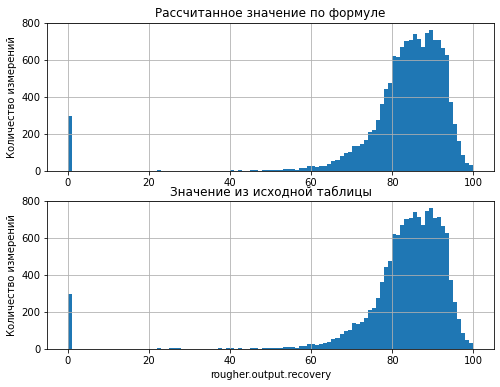

In [30]:
fig, axes = plt.subplots(2, 1, figsize=(8, 6))

df_train_rougher_output_recovery_calculated.hist(bins=100, ax=axes[0])
axes[0].set_title('Рассчитанное значение по формуле')
axes[0].set_ylabel('Количество измерений')

target_rougher_train.hist(bins=100, ax=axes[1])
axes[1].set_title('Значение из исходной таблицы')
axes[1].set_xlabel('rougher.output.recovery')
axes[1].set_ylabel('Количество измерений')
plt.show()


Можем сделать **вывод**, что `rougher.output.recovery` рассчитан корректно. 

### Предобработка данных:

Однако мы видим пик в нулевом значении, который указывает либо на некорректность данных, либо на сбои в оборудовании. 

Проверим, будет ли такой же пик в **тестовой выборке**.

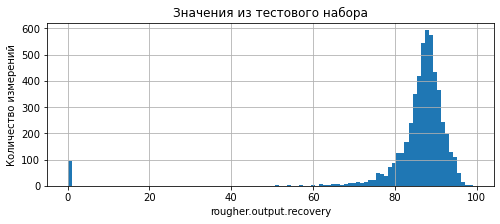

In [31]:
target_rougher_test.hist(bins=100, figsize=(8, 3))
plt.title('Значения из тестового набора')
plt.xlabel('rougher.output.recovery')
plt.ylabel('Количество измерений')
plt.show()

В тестовом наборе так же существует нулевой пик, поэтому, несмотря на некорректность данных, можем оставить их для имитации сбоев в системе, чтобы модель правильно предсказывала целевой признак и в таких условиях.

Проверим, как выглядят распределения финальной эффективности восстановления для обучающего и тестового наборов. 

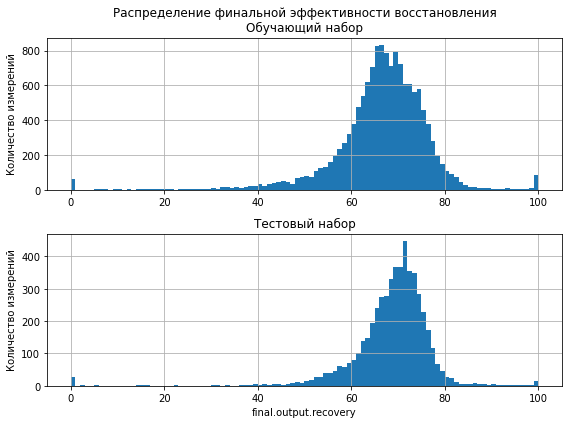

In [32]:
fig, axes = plt.subplots(2, 1, figsize=(8, 6))

target_final_train.hist(bins=100, ax=axes[0])
axes[0].set_title('Распределение финальной эффективности восстановления\nОбучающий набор')
axes[0].set_ylabel('Количество измерений')

target_final_test.hist(bins=100, ax=axes[1])
axes[1].set_title('Тестовый набор')
axes[1].set_xlabel('final.output.recovery')
axes[1].set_ylabel('Количество измерений')

fig.tight_layout()

plt.show()

Видим, что для финальной эффективности такая же ситуация - вроде есть сбои, но уберем их из обучающего набора - испортим модель.

Лучше просто оставим их и посмотрим, что бы могло повлиять на такое распределение.

Так как нулевые пики оставляем - можем оценивать данные по исходной таблице.

Проверим значения, входящие в рассчет эффективности восстановления.
<!-- и имеющиеся в обучающем наборе. -->

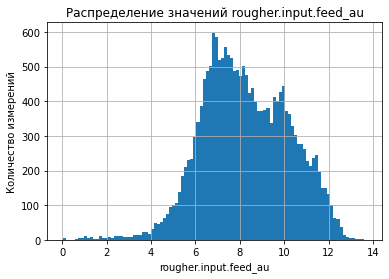

count    19439.000000
mean         8.266097
std          1.955092
min          0.010000
25%          6.854384
50%          8.125839
75%          9.769917
max         13.731330
Name: rougher.input.feed_au, dtype: float64

In [33]:
df_full['rougher.input.feed_au'].hist(bins=100)
plt.xlabel('rougher.input.feed_au')
plt.ylabel('Количество измерений')
plt.title('Распределение значений rougher.input.feed_au')
plt.show()

df_full['rougher.input.feed_au'].describe()

<!-- Видим, что по одному этому значению мы не можем убрать некорректные измерения. Проверим значения из исходной таблицы. -->
Видим, что распределение золота на входе в флотационную установку выглядит реалистично.

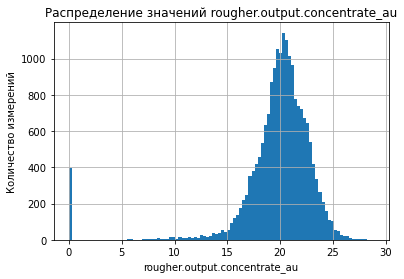

count    19439.000000
mean        19.772000
std          3.753600
min          0.000000
25%         18.802523
50%         20.280214
75%         21.717843
max         28.824507
Name: rougher.output.concentrate_au, dtype: float64

In [34]:
df_full['rougher.output.concentrate_au'].hist(bins=100)
plt.xlabel('rougher.output.concentrate_au')
plt.ylabel('Количество измерений')
plt.title('Распределение значений rougher.output.concentrate_au')
plt.show()

df_full['rougher.output.concentrate_au'].describe()

Минимальное значение 0, и таких значений порядка 400 штук, однако мы предполагаем, что после флотации концентрация золота должна быть не нулевой.
<!-- Если значения с таким выходным параметром есть в обучающем наборе, это затруднит построение модели - мы предполагаем, что после флотации концентрация золота должна быть не нулевой.  -->
<!-- Избавимся от данных значений в обучающем наборе.  -->

Проверим значения в колонке `rougher.output.tail_au`.

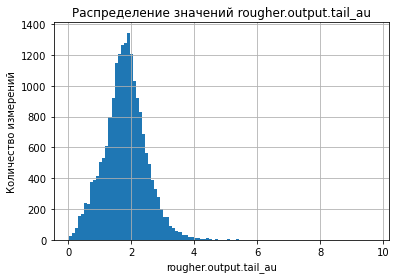

count    19439.000000
mean         1.816391
std          0.680046
min          0.020676
25%          1.404207
50%          1.808170
75%          2.211861
max          9.688980
Name: rougher.output.tail_au, dtype: float64

In [35]:
df_full['rougher.output.tail_au'].hist(bins=100)
plt.xlabel('rougher.output.tail_au')
plt.ylabel('Количество измерений')
plt.title('Распределение значений rougher.output.tail_au')
plt.show()

df_full['rougher.output.tail_au'].describe()

Распределение выглядит реалистичным.

Далее перейдем к проверке признаков, влияющих в основном только на целевой признак `final.output.recovery` - этап флотации мог пройти хорошо, но оборудование не всегда работает идеально и после флотации что-то могло пойти не так - ошибка в оборудовании и в данных.
<!-- , которая повлияет на то, исключим ли мы эти данные из обучающего набора для финальной эффективности обогащения. -->

<!-- Мы видели пик в нулевых значениях, указывающий на то, что восстановления золота не произошло. Это может быть ошибкой в данных или сбой в процессе обогащения. Нам стоит в обучающем наборе избавиться от таких выбросов, для этого проверим параметры, влияющие на значения данной величины.  -->
Проверим следующие признаки:
- `final.output.tail_au`
- `final.output.concentrate_au`
- `primary_cleaner.output.concentrate_au`
- `primary_cleaner.output.tail_au`
- `secondary_cleaner.output.tail_au`

Проверка параметра `final.output.tail_au`.

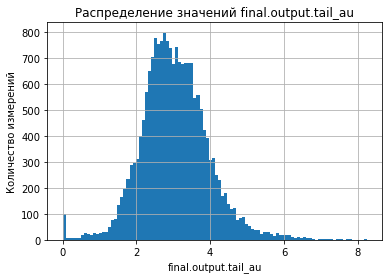

count    19439.000000
mean         3.042467
std          0.922808
min          0.000000
25%          2.461138
50%          2.984909
75%          3.571351
max          8.245022
Name: final.output.tail_au, dtype: float64

In [36]:
df_full['final.output.tail_au'].hist(bins=100)
plt.xlabel('final.output.tail_au')
plt.ylabel('Количество измерений')
plt.title('Распределение значений final.output.tail_au')
plt.show()

df_full['final.output.tail_au'].describe()

Видим нулевой пик - в финальный отвальный хвост не попало ни частички золота, возможно, так и было, но возможно, данные здесь недостоверны. 
<!-- Для увеличения качества модели избавимся в обучающем наборе от значений с нулем в финальном отвальном хвосте. -->

Проверка параметра `final.output.concentrate_au`.

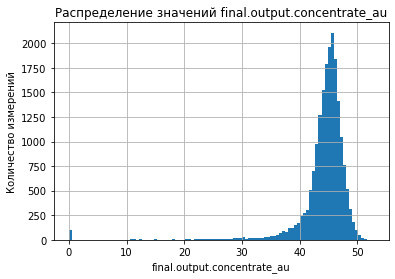

count    19439.000000
mean        44.076513
std          5.129784
min          0.000000
25%         43.402215
50%         45.011244
75%         46.275313
max         52.756638
Name: final.output.concentrate_au, dtype: float64

In [37]:
df_full['final.output.concentrate_au'].hist(bins=100)
plt.xlabel('final.output.concentrate_au')
plt.ylabel('Количество измерений')
plt.title('Распределение значений final.output.concentrate_au')
plt.show()

df_full['final.output.concentrate_au'].describe()

В финальном выходе продукта тоже видим нулевой пик. После всех очисток не получили золота. 
<!-- Возможно так и было, но для модели данный факт ухудшит способности предсказывать верный результат. -->

Проверка параметра `primary_cleaner.output.concentrate_au`.

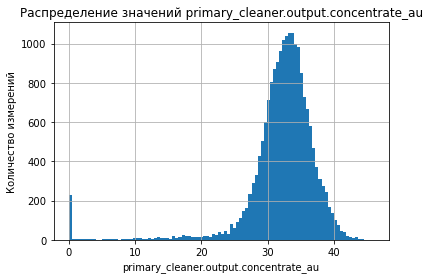

count    19439.000000
mean        32.119400
std          5.627611
min          0.000000
25%         30.463140
50%         32.841295
75%         35.048006
max         45.933934
Name: primary_cleaner.output.concentrate_au, dtype: float64

In [38]:
df_full['primary_cleaner.output.concentrate_au'].hist(bins=100)
plt.xlabel('primary_cleaner.output.concentrate_au')
plt.ylabel('Количество измерений')
plt.title('Распределение значений primary_cleaner.output.concentrate_au')
plt.show()

df_full['primary_cleaner.output.concentrate_au'].describe()

После первичной очистки не было получено золота.
<!-- ? Избавимся от этих значений в тренировочном наборе. -->

Проверка параметра `primary_cleaner.output.tail_au`.

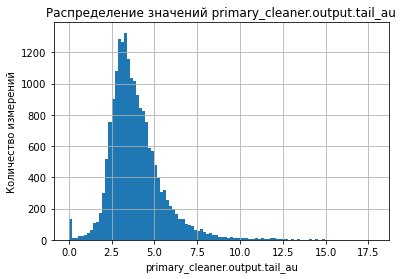

count    19439.000000
mean         3.914179
std          1.593034
min          0.000000
25%          2.924844
50%          3.623234
75%          4.585705
max         17.788925
Name: primary_cleaner.output.tail_au, dtype: float64

In [39]:
df_full['primary_cleaner.output.tail_au'].hist(bins=100)
plt.xlabel('primary_cleaner.output.tail_au')
plt.ylabel('Количество измерений')
plt.title('Распределение значений primary_cleaner.output.tail_au')
plt.show()

df_full['primary_cleaner.output.tail_au'].describe()

Есть нулевой пик - после первичной очистки в отвальный хвост совсем не попало золота.
<!-- , продолжаем очищать обучающий набор. -->

Проверка параметра `secondary_cleaner.output.tail_au`.

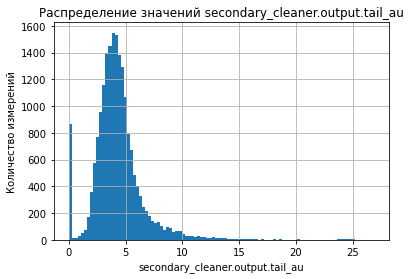

count    19439.000000
mean         4.339625
std          2.326751
min          0.000000
25%          3.182770
50%          4.072412
75%          5.063081
max         26.811643
Name: secondary_cleaner.output.tail_au, dtype: float64

In [40]:
df_full['secondary_cleaner.output.tail_au'].hist(bins=100)
plt.xlabel('secondary_cleaner.output.tail_au')
plt.ylabel('Количество измерений')
plt.title('Распределение значений secondary_cleaner.output.tail_au')
plt.show()

df_full['secondary_cleaner.output.tail_au'].describe()

Снова видим нулевой пик. После вторичной очистки ни частички золота не попало в отвальный хвост.
<!-- - уберем эти данные из обучающего набора. -->

**Вывод**

Ознакомление с данными позволила понять причины краевых пиков у гистограмм распределения целевых признаков.

## Functions_viz

Мы изменили обучающий набор, подправим значения в переменной с целевым признаком. Напишем функцию, которая будет обновлять целевые переменные при изменении в обучающем наборе.

In [41]:
def targets_update():
    global target_final_train
    global target_rougher_train
    target_final_train = target_final_train[features_train_final.index]
    target_rougher_train = target_rougher_train[features_train_rougher.index]

In [42]:
targets_update()

Проверим, как сейчас выглядит распределение целевых признаков обучающего набора.

In [43]:
def target_hist(target, bins=100, label=None):
    target.hist(bins=bins)
    plt.xlabel(label)
    plt.ylabel('Количество измерений')
    plt.title(f'Распределение значений целевого признака\n {label}')
    plt.show()

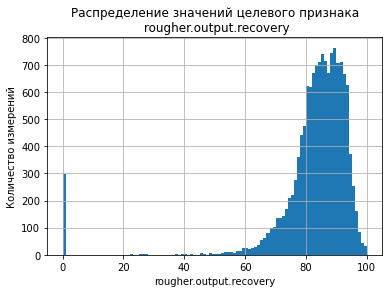

In [44]:
target_hist(target_rougher_train, label='rougher.output.recovery')

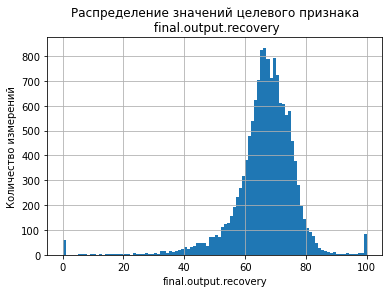

In [45]:
target_hist(target_final_train, label='final.output.recovery')

### Корреляция целевых признаков с признаками из обучающего набора

Оценим взаимосвязь целевых признаков с остальными признаками из обучающего набора. 

Для этого построим хитмап со значениями коррелляции признаков из обучающего набора (строки) с целевыми признаками (столбцы). 

<!-- **Сортировка корреляции шла по целевому признаку `final.output.recovery`** по уменьшению корреляции признаков. -->

**Корреляция признаков из обучающего набора с rougher.output.recovery**

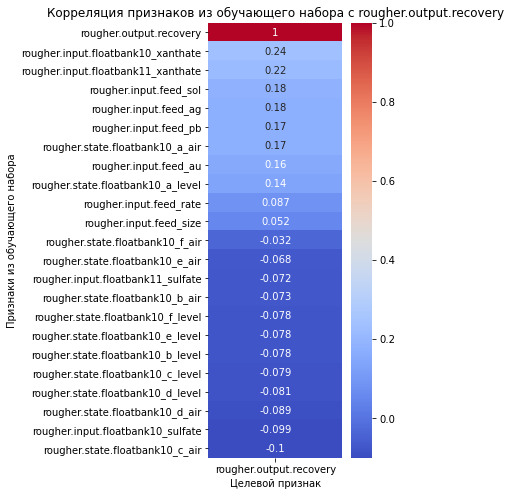

In [46]:
fig, ax = plt.subplots(
    figsize=(3,8)
)
sns.heatmap(
    features_train_rougher.join(target_rougher_train).corr()\
    [['rougher.output.recovery']].sort_values(by='rougher.output.recovery', ascending=False),
    cmap='coolwarm',
    annot=True
            )
plt.title('Корреляция признаков из обучающего набора с rougher.output.recovery')
plt.xlabel('Целевой признак')
plt.ylabel('Признаки из обучающего набора')
plt.show()

Корреляция эффективности восстановления после флотации с поступлением золота во флотационную установку даже ниже, чем с поступлением серебра или свинца.

**Корреляция признаков из обучающего набора с final.output.recovery**

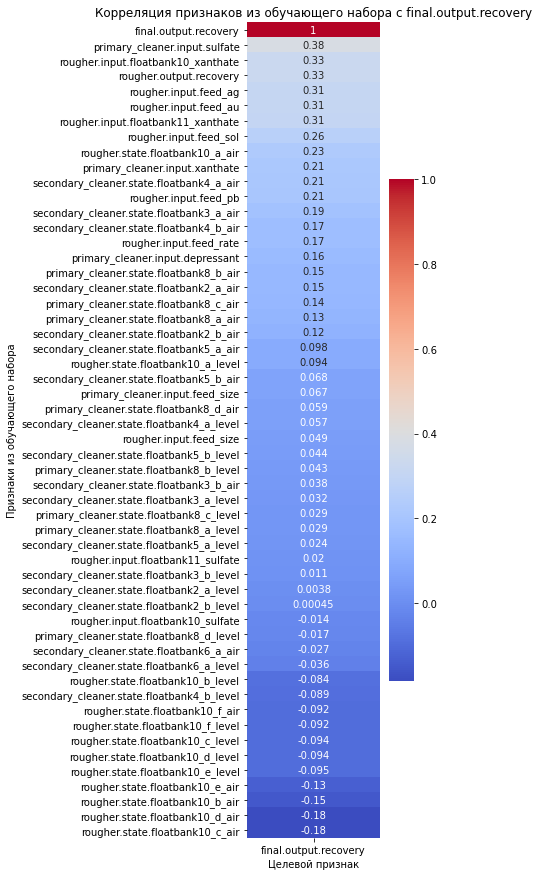

In [47]:
fig, ax = plt.subplots(
    figsize=(3,15)
)
sns.heatmap(
    features_train_final.join(target_final_train).join(target_rougher_train).corr()\
    [['final.output.recovery']].sort_values(by='final.output.recovery', ascending=False),
    cmap='coolwarm',
    annot=True
            )
plt.title('Корреляция признаков из обучающего набора с final.output.recovery')
plt.xlabel('Целевой признак')
plt.ylabel('Признаки из обучающего набора')
plt.show()

Видим, что корреляция признаков с целевыми не достигает значений |0.5| и **даже между целевыми признаками взаимосвязи нет**. 
<!-- и только между целевыми признаками можно уловить взаимосвязь.  -->
Можем сделать вывод, что ни утечки целевых признаков, ни *golden features* не обнаружено.

### Проверка признаков на мультиколлинеарность

Так же для обучения моделей важно, чтобы между самими признаками не было мультиколлинеарности - если корреляция будет слишком высокой, стоит убрать один из признаков при обучении моделей. Визуально оценим признаки по обучающему набору для финальной эффективности.

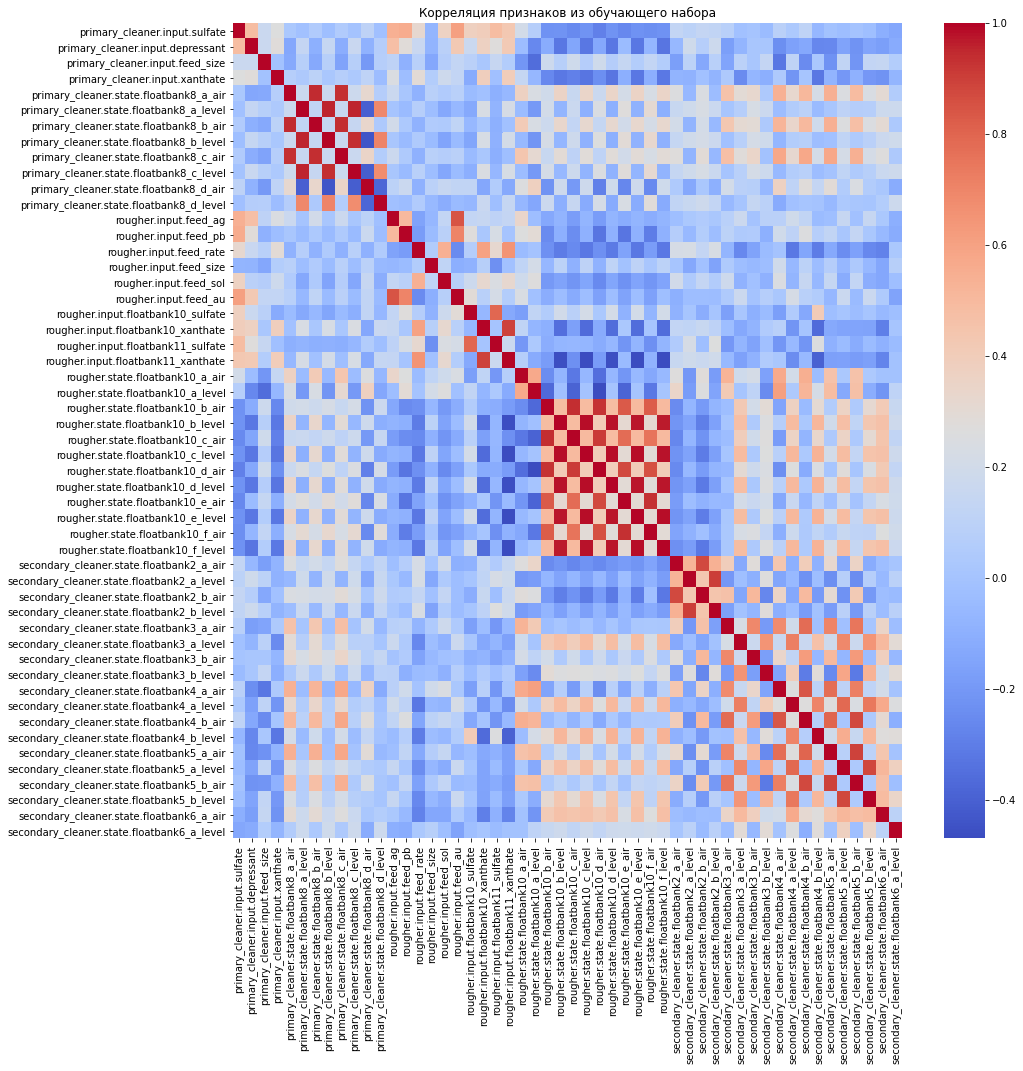

In [48]:
var_corr = features_train_final.corr()

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(var_corr, 
            xticklabels=var_corr.columns, 
            yticklabels=var_corr.columns, 
            cmap= 'coolwarm',
#             annot=True
           )
plt.title('Корреляция признаков из обучающего набора')
plt.show()

Несмотря на огромное количество признаков, которое трудно адекватно визуализировать, на этом хитмапе мы должны обратить внимание только на **градации красного от яркого до темного** - именно там **корреляция выше 0.7**, которая может нас заинтересовать. 

Видим интересные для более детального рассмотрения квадратики со следующими признаками:
- из `primary_cleaner.state`
- из `rougher.input`
- из `rougher.state`
- из `secondary_cleaner.state`

Рассмотрим каждый из них.

#### Мультиколлинеарность признаков из primary_cleaner.state.

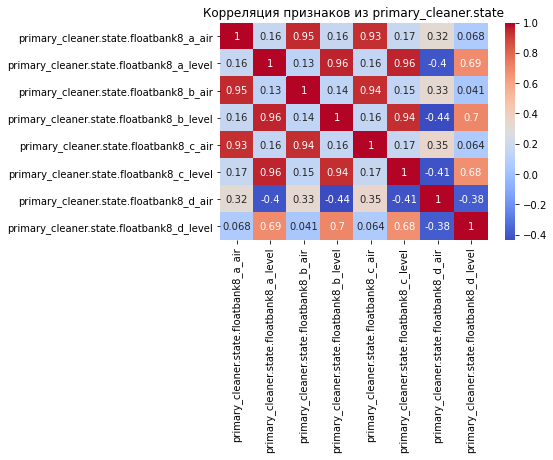

In [49]:
fig, ax = plt.subplots()
sns.heatmap(
    features_train_final.loc[: , features_train_final.columns.str.startswith('primary_cleaner.state')].corr(),
    cmap= 'coolwarm',
    annot=True,
    )
plt.title('Корреляция признаков из primary_cleaner.state')
plt.show()

Возможно, мы имеем дело с сообщающимися сосудами, в таком случае оставить можно только одно из значений. Удалим из обучающего и тренировочного набора мультиколлинеарные признаки.

In [50]:
for data in [features_train_final, features_test_final]:
    data.drop([
    'primary_cleaner.state.floatbank8_b_air', 
    'primary_cleaner.state.floatbank8_c_air',
    'primary_cleaner.state.floatbank8_b_level',
    'primary_cleaner.state.floatbank8_c_level'
], axis=1, inplace=True)

#### Мультиколлинеарность признаков из rougher.input.

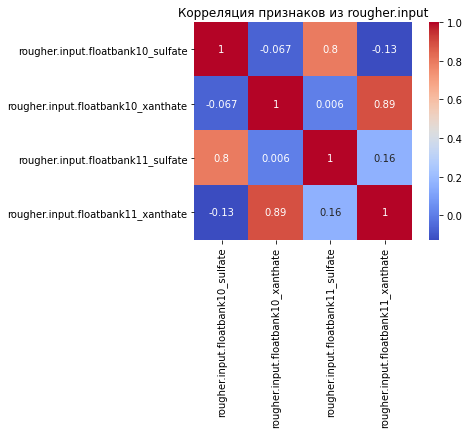

In [51]:
fig, ax = plt.subplots()
sns.heatmap(
    features_train_final.loc[: , features_train_final.columns.str.startswith('rougher.input.flo')].corr(),
    cmap= 'coolwarm',
    annot=True,
    square=True
    )
plt.title('Корреляция признаков из rougher.input')
plt.show()

Видим, что взаимосвязь между флотационными реагентами в разных флотационных установках не достигла уровня 0.9. 
<!-- Удалим мультиколлинеарные признаки. -->

#### Мультиколлинеарность признаков из rougher.state.

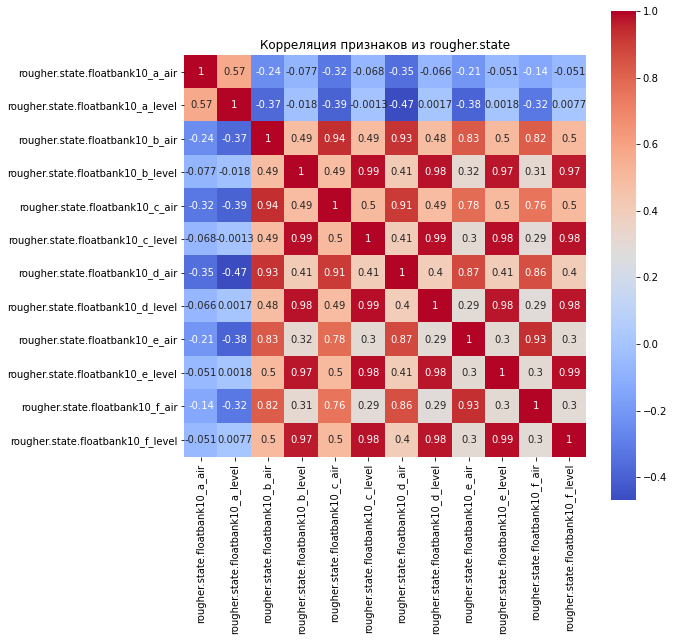

In [52]:
fig, ax = plt.subplots(
    figsize=(9, 9)
)
sns.heatmap(
    features_train_final.loc[: , features_train_final.columns.str.startswith('rougher.state')].corr(),
    cmap= 'coolwarm',
    annot=True,
    square=True
    )
plt.title('Корреляция признаков из rougher.state')
plt.show()

Так же наблюдаем сильную взаимосвязь между флотационными установками. Удалим мультиколлинеарные признаки.

In [53]:
for data in [features_train_final, features_test_final, features_train_rougher, features_test_rougher]:
    data.drop([
    'rougher.state.floatbank10_c_air',
    'rougher.state.floatbank10_d_air',
    'rougher.state.floatbank10_e_air',
    'rougher.state.floatbank10_f_air',
    'rougher.state.floatbank10_c_level',
    'rougher.state.floatbank10_d_level',
    'rougher.state.floatbank10_e_level',
    'rougher.state.floatbank10_f_level'
    ], axis=1, inplace=True)

#### Мультиколлинеарность признаков из secondary_cleaner.state

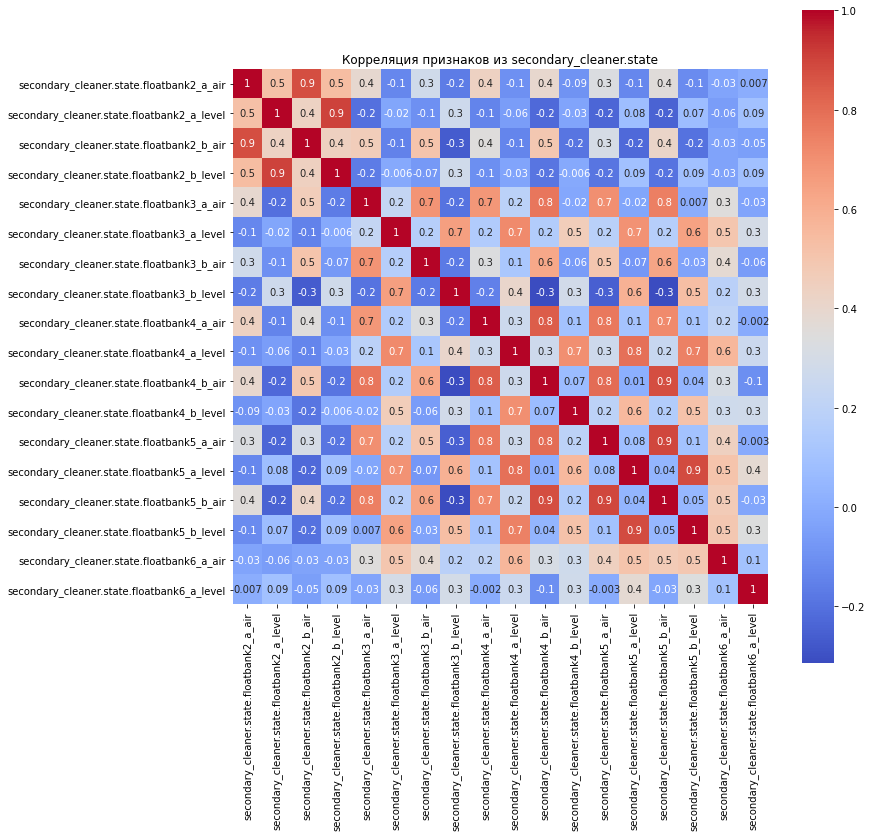

In [54]:
fig, ax = plt.subplots(
    figsize=(12, 12)
)
sns.heatmap(
    features_train_final.loc[: , features_train_final.columns.str.startswith('secondary_cleaner.state')].corr(),
    cmap= 'coolwarm',
    annot=True,
    fmt='.1g',
    square=True
           )
plt.title('Корреляция признаков из secondary_cleaner.state')
plt.show()

Видим, что у некоторых установок есть сильная взаимосвязь.

In [55]:
for data in [features_train_final, features_test_final]:
    data.drop([
        'secondary_cleaner.state.floatbank2_b_air',
        'secondary_cleaner.state.floatbank2_b_level',
        'secondary_cleaner.state.floatbank5_b_air',
        'secondary_cleaner.state.floatbank5_b_level'
    ], axis=1, inplace=True)

Взглянем повторно на корреляционный хитмап.

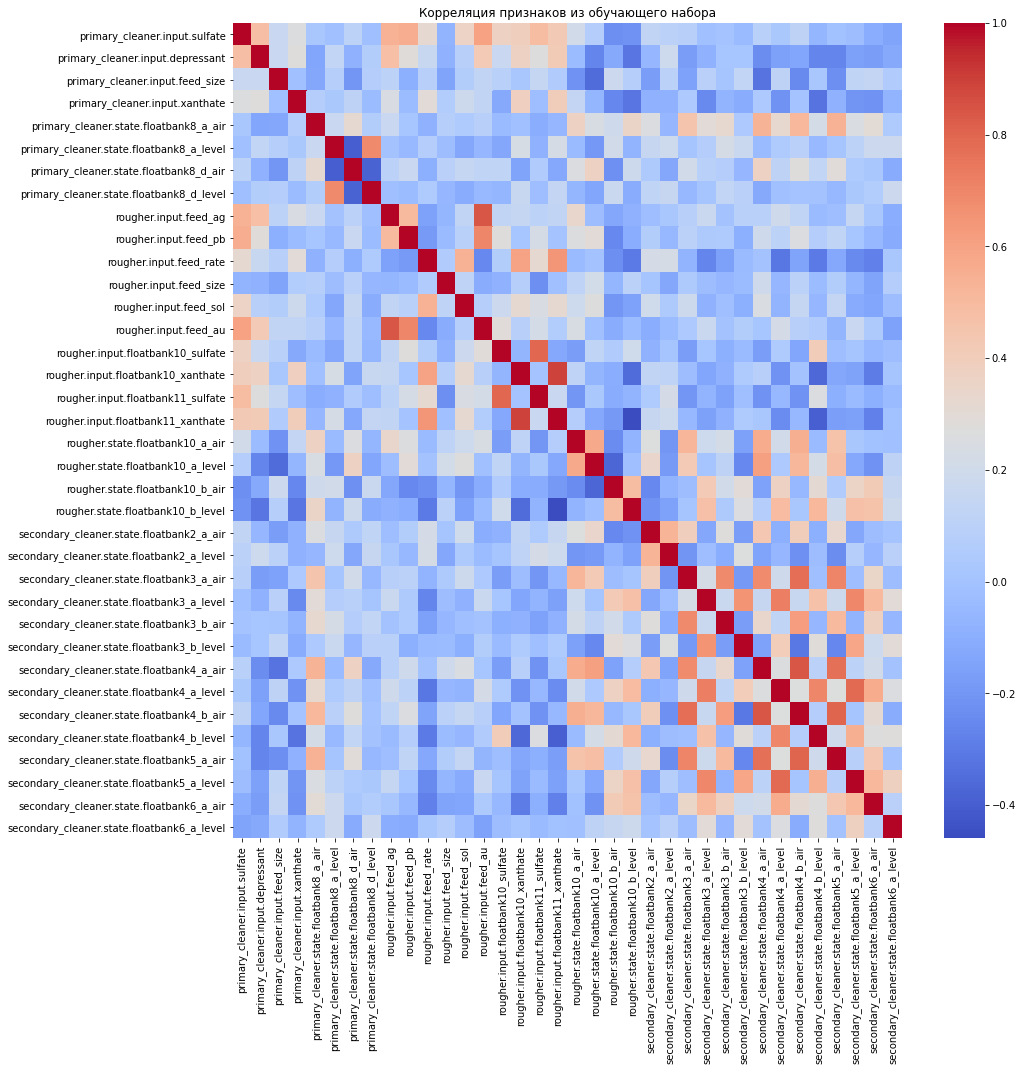

In [56]:
var_corr = features_train_final.corr()

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(var_corr, 
            xticklabels=var_corr.columns, 
            yticklabels=var_corr.columns, 
            cmap= 'coolwarm',
           )
plt.title('Корреляция признаков из обучающего набора')
plt.show()

**Вывод**

От мультиколлинеарности с корреляцией выше 0.9 избавились.

## Анализ данных

### Концентрация металлов на различных этапах очистки.

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. 

Для этого исследуем признаки из исходной таблицы.

<!-- , однако ввиду проведенной предобработки для обучающего набора, возьмем только те исследования, что вошли в обновленный обучающий набор.
 -->
Для исследования концентрации металлов потребуются следующие признаки:

1. Концентрация металлов после флотации:
- `rougher.output.concentrate_ag`
- `rougher.output.concentrate_pb`
- `rougher.output.concentrate_au`

2. Концентрация металлов после первичной очистки:
- `primary_cleaner.output.concentrate_ag`
- `primary_cleaner.output.concentrate_pb`
- `primary_cleaner.output.concentrate_au`

3. Финальная концентрация металлов (после вторичной очистки):
- `final.output.concentrate_ag`
- `final.output.concentrate_pb`
- `final.output.concentrate_au`

Визуализируем значения концентрации металлов.

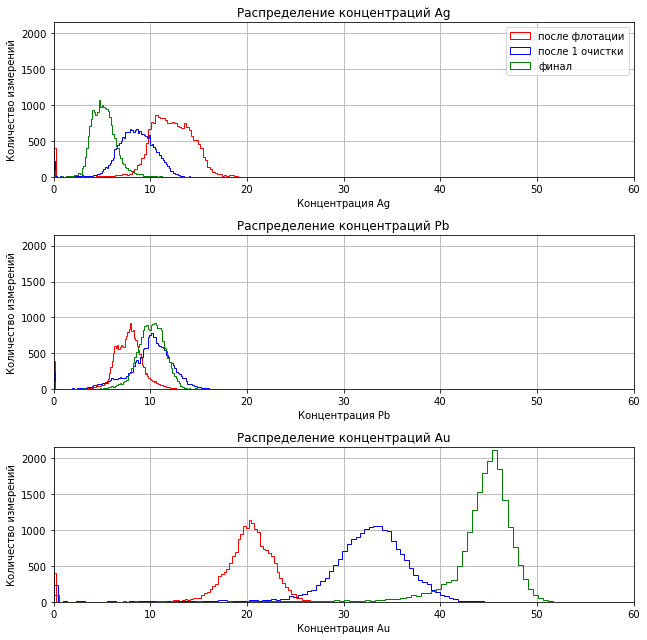

In [57]:
fig, axes = plt.subplots(3, 1, figsize=(9, 9))

df_full['rougher.output.concentrate_ag'].hist(bins=100,
                                              histtype='step',
                                              color='r',
                                              ax=axes[0], 
                                              label=['после флотации'],
                                             )
df_full['primary_cleaner.output.concentrate_ag'].hist(bins=100,
                                                      histtype='step',
                                                      color='b',
                                                      ax=axes[0],
                                                      label='после 1 очистки'
                                                     )
df_full['final.output.concentrate_ag'].hist(bins=100,
                                            histtype='step',
                                            color='g',
                                            ax=axes[0],
                                            label='финал'
                                           )

axes[0].set_xlabel('Концентрация Ag')
axes[0].set_ylabel('Количество измерений')
axes[0].set_title('Распределение концентраций Аg')

df_full['rougher.output.concentrate_pb'].hist(bins=100,
                                              histtype='step',
                                              color='r',
                                              ax=axes[1], 
                                              label='после флотации'
                                             )
df_full['primary_cleaner.output.concentrate_pb'].hist(bins=100,
                                                      histtype='step',
                                                      color='b',
                                                      ax=axes[1],
                                                      label='после 1 очистки'
                                                     )
df_full['final.output.concentrate_pb'].hist(bins=100,
                                            histtype='step',
                                            color='g',
                                            ax=axes[1],
                                            label='финал', 
                                           )
axes[1].set_xlabel('Концентрация Pb')
axes[1].set_ylabel('Количество измерений')
axes[1].set_title('Распределение концентраций Pb')

df_full['rougher.output.concentrate_au'].hist(bins=100,
                                              histtype='step',
                                              color='r',
                                              ax=axes[2], 
                                              label='после флотации'
                                             )
df_full['primary_cleaner.output.concentrate_au'].hist(bins=100,
                                                      histtype='step',
                                                      color='b',
                                                      ax=axes[2],
                                                      label='после 1 очистки'
                                                     )
df_full['final.output.concentrate_au'].hist(bins=100,
                                            histtype='step',
                                            color='g',
                                            ax=axes[2],
                                            label='финал'
                                           )

axes[2].set_xlabel('Концентрация Au')
axes[2].set_ylabel('Количество измерений')
axes[2].set_title('Распределение концентраций Au')
plt.tight_layout()

axes[0].legend()

axes[0].set_xlim(0, 60)
axes[1].set_xlim(0, 60)
axes[2].set_xlim(0, 60)

axes[0].set_ylim(0, 2150)
axes[1].set_ylim(0, 2150)
axes[2].set_ylim(0, 2150)

plt.show()

<!-- fig, axes = plt.subplots(3, 1, figsize=(9, 9))

df_full.loc[df_train.index, 'rougher.output.concentrate_ag'].hist(bins=100,
                                                                  histtype='step',
                                                                  color='r',
                                                                  ax=axes[0], 
                                                                  label=['после флотации'],
                                                                 )
df_full.loc[df_train.index, 'primary_cleaner.output.concentrate_ag'].hist(bins=100,
                                                                          histtype='step',
                                                                          color='b',
                                                                          ax=axes[0],
                                                                          label='после 1 очистки'
                                                                         )
df_full.loc[df_train.index, 'final.output.concentrate_ag'].hist(bins=100,
                                                                histtype='step',
                                                                color='g',
                                                                ax=axes[0],
                                                                label='финал'
                                                               )

axes[0].set_xlabel('Концентрация Ag')
axes[0].set_ylabel('Количество измерений')
axes[0].set_title('Распределение концентраций Аg')

df_full.loc[df_train.index, 'rougher.output.concentrate_pb'].hist(bins=100,
                                                                  histtype='step',
                                                                  color='r',
                                                                  ax=axes[1], 
                                                                  label='после флотации'
                                                                 )
df_full.loc[df_train.index, 'primary_cleaner.output.concentrate_pb'].hist(bins=100,
                                                                          histtype='step',
                                                                          color='b',
                                                                          ax=axes[1],
                                                                          label='после 1 очистки'
                                                                         )
df_full.loc[df_train.index, 'final.output.concentrate_pb'].hist(bins=100,
                                                                histtype='step',
                                                                color='g',
                                                                ax=axes[1],
                                                                label='финал', 
                                                               )
axes[1].set_xlabel('Концентрация Pb')
axes[1].set_ylabel('Количество измерений')
axes[1].set_title('Распределение концентраций Pb')

df_full.loc[df_train.index, 'rougher.output.concentrate_au'].hist(bins=100,
                                                                  histtype='step',
                                                                  color='r',
                                                                  ax=axes[2], 
                                                                  label='после флотации'
                                                                 )
df_full.loc[df_train.index, 'primary_cleaner.output.concentrate_au'].hist(bins=100,
                                                                          histtype='step',
                                                                          color='b',
                                                                          ax=axes[2],
                                                                          label='после 1 очистки'
                                                                         )
df_full.loc[df_train.index, 'final.output.concentrate_au'].hist(bins=100,
                                                                histtype='step',
                                                                color='g',
                                                                ax=axes[2],
                                                                label='финал'
                                                               )
axes[2].set_xlabel('Концентрация Au')
axes[2].set_ylabel('Количество измерений')
axes[2].set_title('Распределение концентраций Au')
plt.tight_layout()

axes[0].legend()

axes[0].set_xlim(0, 50)
axes[1].set_xlim(0, 50)
axes[2].set_xlim(0, 50)

axes[0].set_ylim(0, 1350)
axes[1].set_ylim(0, 1350)
axes[2].set_ylim(0, 1350)

plt.show() -->

- После очистки концентрация золота ожидаемо увеличилась. 
- Свинец, как тяжелый металл, тоже увеличил свою концентрацию после очистки.
- Серебра на каждом этапе очистки становилось всё меньше и меньше.

Однако мы видим нулевые пики в концентрациях. Очистим от них обучающий набор данных.

### Распределение размеров гранул сырья

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. 

Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

Сравним размеры гранул сырья, поступающие во флотационную установку.

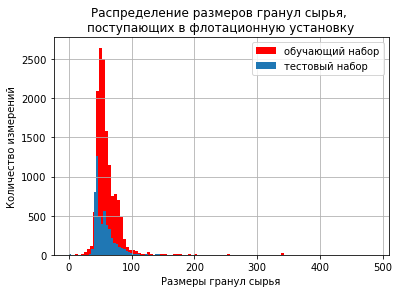

In [58]:
features_train_rougher['rougher.input.feed_size'].hist(bins=100, color='r')
features_test_rougher['rougher.input.feed_size'].hist(bins=100)
plt.legend(['обучающий набор', 'тестовый набор'])
plt.xlabel('Размеры гранул сырья')
plt.ylabel('Количество измерений')
plt.title('Распределение размеров гранул сырья, \nпоступающих в флотационную установку')
plt.show()

Распределение размеров различаются, но у обоих выборок схожие интервалы наиболее частых распределений. Встречаются выбросы - в флотационную установку попадают достаточно крупные гранулы. Посмотрим, что происходит после флотации - у нас есть данные о размере гранул перед первичной очисткой.

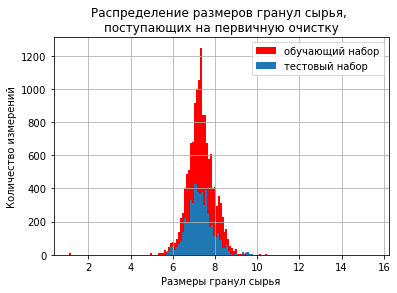

In [59]:
features_train_final['primary_cleaner.input.feed_size'].hist(bins=100, color='r')
features_test_final['primary_cleaner.input.feed_size'].hist(bins=100)
plt.legend(['обучающий набор', 'тестовый набор'])
plt.xlabel('Размеры гранул сырья')
plt.ylabel('Количество измерений')
plt.title('Распределение размеров гранул сырья, \nпоступающих на первичную очистку')
plt.show()

Флотация сгладила все различия в размерах зерен на входе - от выбросов в размерах зерен можем не избавляться. Распределения размеров гранул в обоих наборах стали похожи друг на друга.

### Суммарная концентрация всех веществ

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Для этого нам понадобятся следующие колонки:

In [60]:
for i in df_full.columns:
    if 'concentrate' in i:
        print(i)

final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_sol
final.output.concentrate_au
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.concentrate_au
rougher.calculation.sulfate_to_au_concentrate
rougher.output.concentrate_ag
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.concentrate_au


Добавим в исходную таблицу суммированные значения концентраций на разных стадиях.

In [61]:
# суммарная концентрация после флотации
df_full['rougher.output.concentrate_all'] = df_full['rougher.output.concentrate_ag'] + \
df_full['rougher.output.concentrate_pb'] + \
df_full['rougher.output.concentrate_sol'] + \
df_full['rougher.output.concentrate_au']

# суммарная концентрация после первичной очистки
df_full['primary_cleaner.output.concentrate_all'] = df_full['primary_cleaner.output.concentrate_ag'] + \
df_full['primary_cleaner.output.concentrate_pb'] + \
df_full['primary_cleaner.output.concentrate_sol'] + \
df_full['primary_cleaner.output.concentrate_au']

# суммарная концентрация финальная
df_full['final.output.concentrate_all'] = df_full['final.output.concentrate_ag'] + \
df_full['final.output.concentrate_pb'] + \
df_full['final.output.concentrate_sol'] + \
df_full['final.output.concentrate_au']

Визуализируем изменения в суммарной концентрации по исходной таблице.

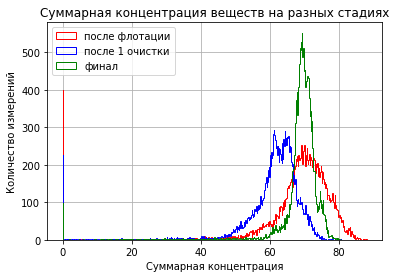

In [62]:
df_full['rougher.output.concentrate_all'].hist(bins=500,
                                               histtype='step',
                                               color='r',
                                               label=['после флотации'],
                                              )
df_full['primary_cleaner.output.concentrate_all'].hist(bins=500,
                                                       histtype='step',
                                                       color='b',
                                                       label='после 1 очистки'
                                                      )
df_full['final.output.concentrate_all'].hist(bins=500,
                                             histtype='step',
                                             color='g',
                                             label='финал'
                                            )
plt.legend(loc=2)
plt.ylabel('Количество измерений')
plt.xlabel('Суммарная концентрация')
plt.title('Суммарная концентрация веществ на разных стадиях')
plt.show()

В исходной таблице есть нулевые пики суммарной концентрации, вероятно, неверные данные или сбой в системе.

Проанализируем значения из обучающего набора.

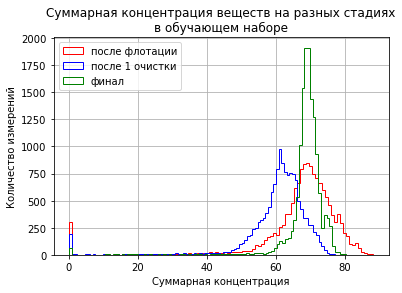

In [63]:
df_full.loc[features_train_final.index, 'rougher.output.concentrate_all'].hist(bins=100,
                                                                              histtype='step',
                                                                              color='r',
                                                                              label=['после флотации'],
                                                                             )
df_full.loc[features_train_final.index, 'primary_cleaner.output.concentrate_all'].hist(bins=100,
                                                                                      histtype='step',
                                                                                      color='b',
                                                                                      label='после 1 очистки'
                                                                                     )
df_full.loc[features_train_final.index, 'final.output.concentrate_all'].hist(bins=100,
                                                                            histtype='step',
                                                                            color='g',
                                                                            label='финал'
                                                                           )
plt.legend(loc=2)
plt.ylabel('Количество измерений')
plt.xlabel('Суммарная концентрация')
plt.title('Суммарная концентрация веществ на разных стадиях\nв обучающем наборе')
plt.show()

Проанализируем значения из тестового набора.

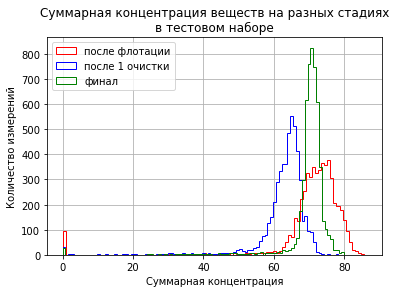

In [64]:
df_full.loc[features_test_final.index, 'rougher.output.concentrate_all'].hist(bins=100,
                                                                              histtype='step',
                                                                              color='r',
                                                                              label=['после флотации'],
                                                                             )
df_full.loc[features_test_final.index, 'primary_cleaner.output.concentrate_all'].hist(bins=100,
                                                                                      histtype='step',
                                                                                      color='b',
                                                                                      label='после 1 очистки'
                                                                                     )
df_full.loc[features_test_final.index, 'final.output.concentrate_all'].hist(bins=100,
                                                                            histtype='step',
                                                                            color='g',
                                                                            label='финал',
                                                                           )
plt.legend(loc=2)
plt.ylabel('Количество измерений')
plt.xlabel('Суммарная концентрация')
plt.title('Суммарная концентрация веществ на разных стадиях\nв тестовом наборе')
plt.show()

- После флотации большинство значений суммарной концентрации колебались в более широком диапазоне: примерно от 45 до 90.
- После первичной очистки: примерно от 40 до 75.
- Финальная суммарная концентрация распределилась в более узком диапазоне: примерно от 55 до 80. 
- Остальные вещества должны были уйти в отвальные хвосты.

- **В обоих наборах данных есть нулевые аномали.** От них мы не избавились, дабы модель могла предсказывать эффективность даже в условиях сбоев.

Проверим, что нигде не съехали индексы.

In [65]:
(target_rougher_train.index == features_train_rougher.index).mean()

1.0

In [66]:
(target_final_train.index == features_train_final.index).mean()

1.0

## Модели

Далее перейдем к обучению моделей для предсказания целевых признаков. 

- Для оценки качества моделей нам понадобятся функции для вычисления симметричной средней абсолютной ошибки в процентах.
- Перед обучением модели необходимо масштабировать признаки.
- Так же для выбора лучшей модели для тестирования нам понадобится оценить качество всех моделей кросс-валидацией.

Создадим переменные для значения `random_state`.
<!-- и предел по времени обучения моделей `timeout`. -->
<!-- timeout = 600 -->

In [67]:
state = 12345

### Функция для вычисления sMAPE.

Напишем функцию для вычисления `sMAPE` для каждого из этапов: `rougher` и `final`.

In [68]:
def smape(target, predictions):
    '''
    функция принимает на вход целевые значения target и предсказания predictions 
    и возвращает симметричную среднюю абсолютную ошибку в процентах
    '''
    target = np.array(target)
    predictions = np.array(predictions)
    
    a = np.abs(target - predictions)
    b = (np.abs(target) + np.abs(predictions)) / 2
    
    result = np.mean(a / b) * 100
    
    return result

Напишем функцию для вычисления итоговой `sMAPE`.

In [69]:
def total_smape(smape_rougher, smape_final):
    return 0.25 * smape_rougher + 0.75 * smape_final

### Оценка выборок

Оценим равномерность распределения целевых признаков по выборкам.


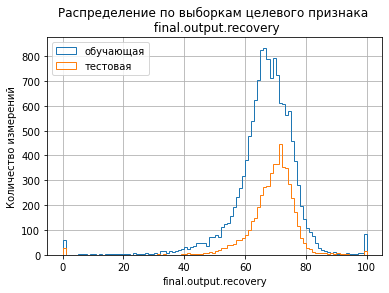

In [70]:
target_final_train.hist(
    bins=100,
    histtype='step'
)

target_final_test.hist(
    bins=100,
    histtype='step'
)
plt.legend(['обучающая', 'тестовая'], loc=2)
plt.title('Распределение по выборкам целевого признака \n final.output.recovery')
plt.ylabel('Количество измерений')
plt.xlabel('final.output.recovery')
plt.show()

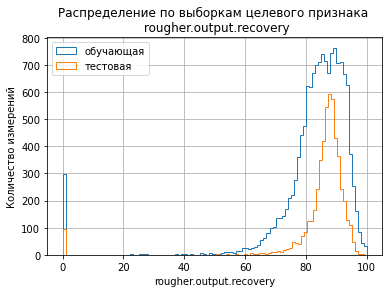

In [71]:
target_rougher_train.hist(
    bins=100,
    histtype='step'
)

target_rougher_test.hist(
    bins=100,
    histtype='step'
)
plt.legend(['обучающая', 'тестовая'], loc=2)
plt.title('Распределение по выборкам целевого признака \n rougher.output.recovery')
plt.ylabel('Количество измерений')
plt.xlabel('rougher.output.recovery')
plt.show()

- Видим, что в тестовой выборке и обучающей остались нулевые пики, но тестовая выборка имитирует данные на входе, которые мы не подвергаем точечной предобработке.

- Распределения целевых признаков по выборкам имеют схожую картину и пригодны для обучения моделей и их проверки.

На данном этапе появилась идея откинуть флотационные признаки в укороченной выборке для финальной эффективности, так как корреляция между `final.output.recovery` и `rougher.output.recovery` была низкой - возможно, флотационные признаки не сильно влияют на исходный результат.

In [72]:
features_train_final_short = features_train_final.drop(list(features_train_rougher.columns), axis=1)

### Масштабирование признаков

Масштабируем данные, хранящиеся в выборках, используя стандартизацию.

Создадим объект структуры `RobustScaler`.
<!-- и настроим его на обучающих данных. Настройка — это вычисление среднего и дисперсии. -->

In [73]:
scaler = RobustScaler()

Далее мы используем его в `Pipeline`.

<!-- # scaler_rougher = StandardScaler()
scaler_rougher = RobustScaler()
scaler_rougher.fit(features_train_rougher)

# scaler_final = StandardScaler()
scaler_final = RobustScaler()
scaler_final.fit(features_train_final)

# для укороченной выборки
scaler_final_short = RobustScaler()
scaler_final_short.fit(features_train_final_short)

# Преобразуем обучающую и тестовую выборки функцией `transform()`.

features_train_rougher_norm = scaler_rougher.transform(features_train_rougher)
features_test_rougher_norm = scaler_rougher.transform(features_test_rougher)

features_train_final_norm = scaler_final.transform(features_train_final)
features_test_final_norm = scaler_final.transform(features_test_final)

# для укороченной выборки
features_train_final_short_norm = scaler_final_short.transform(features_train_final_short) -->

Для предсказания коэффициента восстановления золота из золотосодержащей руды нам нужно будет обучить две модели: первую для предсказания целевого признака `rougher.output.recovery` и вторую для `final.output.recovery`.

Обучим несколько моделей и оценим их качество кросс-валидацией.

### Модель линейной регрессии

Превратим метрику sMAPE в `scorer`, который можно использовать как параметр функции `cross_val_score`. 

In [74]:
smape_score = make_scorer(
    smape, 
    greater_is_better=False
)

Построим пайплайн для модели линейной регрессии.

In [75]:
pipe_lasso = Pipeline([
    ('scaler', scaler),
    ('model', Lasso(random_state=state))

])

params_lasso = [
    {
        'model': [Lasso(random_state=state)],
        'model__alpha': np.logspace(-3, 1, 10)
    },
]

cv = KFold(n_splits=5, shuffle=False, random_state=None)

In [76]:
grid_lasso = GridSearchCV(pipe_lasso, param_grid=params_lasso, cv=cv, n_jobs=-1, scoring=smape_score, verbose=1)

Расчет метрики качества предсказания эффективности восстановления после флотации.

In [77]:
# rougher
grid_lasso.fit(features_train_rougher, target_rougher_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('model', Lasso(random_state=12345))]),
             n_jobs=-1,
             param_grid=[{'model': [Lasso(alpha=0.46415888336127775,
                                          random_state=12345)],
                          'model__alpha': array([1.00000000e-03, 2.78255940e-03, 7.74263683e-03, 2.15443469e-02,
       5.99484250e-02, 1.66810054e-01, 4.64158883e-01, 1.29154967e+00,
       3.59381366e+00, 1.00000000e+01])}],
             scoring=make_scorer(smape, greater_is_better=False), verbose=1)

In [78]:
lasso_r_smape = -grid_lasso.best_score_
print('Best Params:', grid_lasso.best_params_)
print()
print('Best smape Score:', lasso_r_smape)

Best Params: {'model': Lasso(alpha=0.46415888336127775, random_state=12345), 'model__alpha': 0.46415888336127775}

Best smape Score: 12.016257555254358


Кросс-валидацией нашли лучшую модель, сохраним ее.

In [79]:
lasso_model_r = grid_lasso.best_estimator_

Посмотрим значимость признаков.

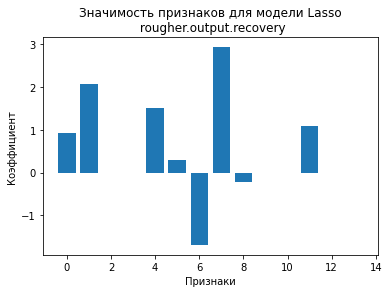

In [80]:
importance_r = lasso_model_r.steps[1][1].coef_

plt.bar([x for x in range(len(importance_r))], importance_r)
plt.xlabel('Признаки')
plt.ylabel('Коэффициент')
plt.title('Значимость признаков для модели Lasso\n rougher.output.recovery')
plt.show()

Создадим список признаков повышенной важностью.

In [81]:
lasso_rougher_list = []
for i in range(len(importance_r)):
    if abs(importance_r[i]) > 0.01:
        lasso_rougher_list.append(i)
        
lasso_rougher_list

[0, 1, 4, 5, 6, 7, 8, 11]

Посмотрим, как изменится качество модели с урезанным набором признаков.

In [82]:
grid_lasso.fit(features_train_rougher.iloc[:, lasso_rougher_list], target_rougher_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('model', Lasso(random_state=12345))]),
             n_jobs=-1,
             param_grid=[{'model': [Lasso(alpha=0.1668100537200059,
                                          random_state=12345)],
                          'model__alpha': array([1.00000000e-03, 2.78255940e-03, 7.74263683e-03, 2.15443469e-02,
       5.99484250e-02, 1.66810054e-01, 4.64158883e-01, 1.29154967e+00,
       3.59381366e+00, 1.00000000e+01])}],
             scoring=make_scorer(smape, greater_is_better=False), verbose=1)

In [83]:
lasso_r_short_smape = -grid_lasso.best_score_
print('Best Params:', grid_lasso.best_params_)
print()
print('Best smape Score:', lasso_r_short_smape)

Best Params: {'model': Lasso(alpha=0.1668100537200059, random_state=12345), 'model__alpha': 0.1668100537200059}

Best smape Score: 11.46479414972116


Качество улучшилось, сохраним и обучим модель.

In [84]:
lasso_model_r_cut = grid_lasso.best_estimator_
lasso_model_r_cut.fit(features_train_rougher.iloc[:, lasso_rougher_list], target_rougher_train)

Pipeline(steps=[('scaler', RobustScaler()),
                ('model', Lasso(alpha=0.1668100537200059, random_state=12345))])

Расчет метрики качества предсказания финальной эффективности восстановления.

In [85]:
# final 
grid_lasso.fit(features_train_final, target_final_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('model', Lasso(random_state=12345))]),
             n_jobs=-1,
             param_grid=[{'model': [Lasso(alpha=0.46415888336127775,
                                          random_state=12345)],
                          'model__alpha': array([1.00000000e-03, 2.78255940e-03, 7.74263683e-03, 2.15443469e-02,
       5.99484250e-02, 1.66810054e-01, 4.64158883e-01, 1.29154967e+00,
       3.59381366e+00, 1.00000000e+01])}],
             scoring=make_scorer(smape, greater_is_better=False), verbose=1)

In [86]:
lasso_f_smape = -grid_lasso.best_score_
print('Best Params:', grid_lasso.best_params_)
print()
print('Best smape Score:', lasso_f_smape)

Best Params: {'model': Lasso(alpha=0.46415888336127775, random_state=12345), 'model__alpha': 0.46415888336127775}

Best smape Score: 10.397658761008433


Кросс-валидацией нашли лучшую модель, обучим ее.

In [87]:
lasso_model_f = grid_lasso.best_estimator_
lasso_model_f.fit(features_train_final, target_final_train)

Pipeline(steps=[('scaler', RobustScaler()),
                ('model',
                 Lasso(alpha=0.46415888336127775, random_state=12345))])

Проверим урезанную выборку.

In [88]:
# final short
grid_lasso.fit(features_train_final_short, target_final_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('model', Lasso(random_state=12345))]),
             n_jobs=-1,
             param_grid=[{'model': [Lasso(alpha=0.007742636826811269,
                                          random_state=12345)],
                          'model__alpha': array([1.00000000e-03, 2.78255940e-03, 7.74263683e-03, 2.15443469e-02,
       5.99484250e-02, 1.66810054e-01, 4.64158883e-01, 1.29154967e+00,
       3.59381366e+00, 1.00000000e+01])}],
             scoring=make_scorer(smape, greater_is_better=False), verbose=1)

In [89]:
lasso_f_short_smape = -grid_lasso.best_score_
print('Best Params:', grid_lasso.best_params_)
print()
print('Best smape Score:', lasso_f_short_smape)

Best Params: {'model': Lasso(alpha=0.007742636826811269, random_state=12345), 'model__alpha': 0.007742636826811269}

Best smape Score: 10.439635247424428


Рассчеты на урезанной выборке оказались хуже. 


Оценим значимость признаков на полной выборке.

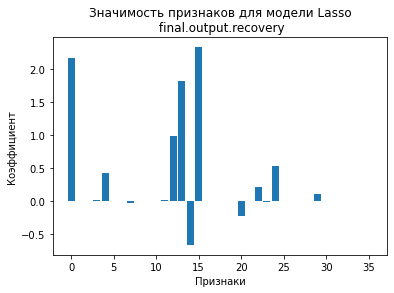

In [90]:
importance_f = lasso_model_f.steps[1][1].coef_

plt.bar([x for x in range(len(importance_f))], importance_f)
plt.xlabel('Признаки')
plt.ylabel('Коэффициент')
plt.title('Значимость признаков для модели Lasso\n final.output.recovery')
plt.show()

In [91]:
lasso_final_list = []
for i in range(len(importance_f)):
    if abs(importance_f[i]) > 0.01:
        lasso_final_list.append(i)
        
lasso_final_list

[0, 3, 4, 7, 11, 12, 13, 14, 15, 20, 22, 24, 29]

Посмотрим, как изменится качеcтво модели с урезанным набором признаков.

In [92]:
grid_lasso.fit(features_train_final.iloc[:, lasso_final_list], target_final_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('model', Lasso(random_state=12345))]),
             n_jobs=-1,
             param_grid=[{'model': [Lasso(alpha=0.021544346900318832,
                                          random_state=12345)],
                          'model__alpha': array([1.00000000e-03, 2.78255940e-03, 7.74263683e-03, 2.15443469e-02,
       5.99484250e-02, 1.66810054e-01, 4.64158883e-01, 1.29154967e+00,
       3.59381366e+00, 1.00000000e+01])}],
             scoring=make_scorer(smape, greater_is_better=False), verbose=1)

In [93]:
lasso_f_short_smape = -grid_lasso.best_score_
print('Best Params:', grid_lasso.best_params_)
print()
print('Best smape Score:', lasso_f_short_smape)

Best Params: {'model': Lasso(alpha=0.021544346900318832, random_state=12345), 'model__alpha': 0.021544346900318832}

Best smape Score: 9.752833805645567


Качество улучшилось, сохраним  модель.

In [94]:
lasso_model_f_cut = grid_lasso.best_estimator_

Метрика так же улучшилась. Подсчитаем итоговую sMAPE.

In [95]:
smape_lasso = total_smape(lasso_r_short_smape, lasso_f_short_smape)
smape_lasso

10.180823891664465

Создадим переменные со значениями метрик для последующей визуализации.

In [96]:
rougher_recovery = [lasso_r_short_smape]
final_recovery = [lasso_f_short_smape]
list_of_total_smape = [smape_lasso]

labels_recovery = ['linear regression']

### Модель решающего дерева

Обучим модели решающего дерева.

**Примечание**

На данном этапе стоит отметить, что модели деревьев считаются достаточно долго, поэтому в работе были протестированы большие значения глубины дерева и количества деревьев (для случайного леса), однако затем в циклах намеренно написаны значения около тех, что показали лучшие метрики. Данный шаг сделан осознанно для уменьшения времени расчетов.

На модели с деревьями не влияет масштабирование признаков, будем использовать не масштабированные данные.

In [97]:
model_dt_rougher = None
model_dt_final = None
model_df_final_short = None

model_dt_rougher_depth = None
model_dt_final_depth = None
model_dt_final_depth_short = None

scores_dt_rougher_mean = 100
scores_dt_rougher_std = None


scores_dt_final_mean = 100
scores_dt_final_std = None

scores_dt_final_mean_short = 100
scores_dt_final_std_short = None

Финальная эффективность

In [98]:
%%time
for depth in range(2, 5):
    model_final = DecisionTreeRegressor(random_state=state, max_depth=depth)
    scores_final = cross_val_score(model_final, features_train_final, target_final_train, cv=5, scoring=smape_score)
    if scores_final.mean() < scores_dt_final_mean:
        model_dt_final = model_final
        scores_dt_final_mean = scores_final.mean()
        scores_dt_final_std = scores_final.std()
        model_dt_final_depth = depth
        
print('final.output.recovery')
print(f'{abs(scores_dt_final_mean):.2f} sMAPE со стандартным отклонением {scores_dt_final_std:.2f}')
print(f'Глубина дерева: {model_dt_final_depth}')

final.output.recovery
10.90 sMAPE со стандартным отклонением 0.50
Глубина дерева: 4
Wall time: 2.12 s


Финальная эффективность на укороченной выборке

In [99]:
%%time
for depth in range(2, 4):
    model_final_short = DecisionTreeRegressor(random_state=state, max_depth=depth)
    scores_final_short = cross_val_score(model_final_short, features_train_final_short, target_final_train, cv=5, scoring=smape_score)
    if scores_final_short.mean() < scores_dt_final_mean_short:
        model_dt_final_short = model_final_short
        scores_dt_final_mean_short = scores_final_short.mean()
        scores_dt_final_std_short = scores_final_short.std()
        model_dt_final_depth_short = depth
        
print('final.output.recovery')
print(f'{abs(scores_dt_final_mean_short):.2f} sMAPE со стандартным отклонением {scores_dt_final_std_short:.2f}')
print(f'Глубина дерева: {model_dt_final_depth_short}')

final.output.recovery
11.90 sMAPE со стандартным отклонением 0.49
Глубина дерева: 3
Wall time: 733 ms


Предсказания финальной эффективности на укороченной выборке показали хуже метрики качества. Для модели решающего дерева будем использовать неукороченную модель.

Проверим важность признаков.

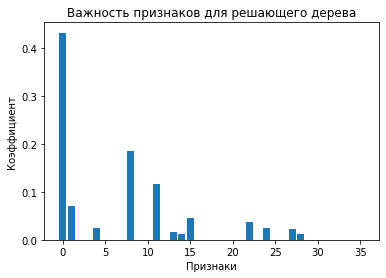

In [100]:
model_dt_final = DecisionTreeRegressor(random_state=state, max_depth=model_dt_final_depth)

model_dt_final.fit(features_train_final, target_final_train)

importance = model_dt_final.feature_importances_

plt.bar([x for x in range(len(importance))], importance)
plt.xlabel('Признаки')
plt.ylabel('Коэффициент')
plt.title('Важность признаков для решающего дерева')
plt.show()

In [101]:
final_train_dt_list = []
for i in range(len(importance)):
    if abs(importance[i]) > 0.01:
        final_train_dt_list.append(i)
        
final_train_dt_list

[0, 1, 4, 8, 11, 13, 14, 15, 22, 24, 27, 28]

In [102]:
model_dt_final_cut = DecisionTreeRegressor(random_state=state, max_depth=model_dt_final_depth)

scores_dt_final_cut = cross_val_score(model_dt_final_cut, features_train_final.iloc[:, final_train_dt_list] , target_final_train, cv=5, scoring=smape_score)
smape_dt_final_cut = scores_dt_final_cut.mean()
print('Только признаки с повышенным влиянием')
print('final.output.recovery')
print(f'{abs(smape_dt_final_cut):.2f} sMAPE со стандартным отклонением {scores_dt_final_cut.std():.2f}')


Только признаки с повышенным влиянием
final.output.recovery
10.71 sMAPE со стандартным отклонением 0.71


Удаление признаков с низким коэффициентом положительно сказалось на модели, но незначительно, а стандартное отклонение увеличилось. Дабы не провоцировать переучение модели, не будем уменьшать количество признаков.

Эффективность после флотации.

In [103]:
%%time
for depth in range(2, 5):
    model_rougher = DecisionTreeRegressor(random_state=state, max_depth=depth)
    scores_rougher = cross_val_score(model_rougher, features_train_rougher, target_rougher_train, cv=15, scoring=smape_score)
    if scores_rougher.mean() < scores_dt_rougher_mean:
        model_dt_rougher = model_rougher
        scores_dt_rougher_mean = scores_rougher.mean()
        scores_dt_rougher_std = scores_rougher.std()
        model_dt_rougher_depth = depth
        
print('rougher.output.recovery')
print(f'{abs(scores_dt_rougher_mean):.2f} sMAPE со стандартным отклонением {scores_dt_rougher_std:.2f}')
print(f'Глубина дерева: {model_dt_rougher_depth}')

rougher.output.recovery
12.57 sMAPE со стандартным отклонением 6.35
Глубина дерева: 2
Wall time: 2.97 s


In [104]:
total_smape_dt = -total_smape(scores_dt_rougher_mean, scores_dt_final_mean)
total_smape_dt

11.32030029860018

Добавим получившиеся значения метрик в списки для визуализации.

In [105]:
rougher_recovery.append(abs(scores_dt_rougher_mean))
final_recovery.append(abs(scores_dt_final_mean))
list_of_total_smape.append(total_smape_dt)
labels_recovery.append('decision tree')

Визуализируем разницу метрик для разных моделей для признака `rougher.output.recovery`.

In [106]:
def rougher_viz():
    plt.bar(labels_recovery, rougher_recovery)
    plt.xlabel('Модель')
    plt.ylabel('sMAPE')
    plt.title('sMAPE различных моделей для признака\n rougher.output.recovery')
    plt.show()

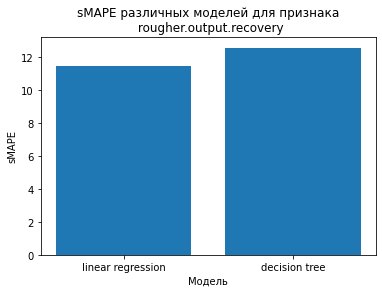

In [107]:
rougher_viz()

- Для целевого признака `rougher.output.recovery` у модели решающего дерева метрика sMAPE вышла хуже, чем для модели линейной регрессии.

Визуализируем разницу метрик для разных моделей для признака `final.output.recovery`.

In [108]:
def final_viz():
    plt.bar(labels_recovery, final_recovery)
    plt.xlabel('Модель')
    plt.ylabel('sMAPE')
    plt.title('sMAPE различных моделей для признака\n final.output.recovery')
    plt.show()

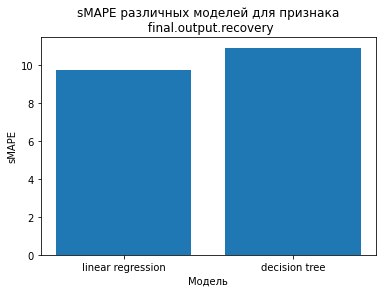

In [109]:
final_viz()

- Для целевого признака `final.output.recovery` у модели решающего дерева метрика sMAPE оказалась хуже, чем для модели линейной регрессии.

Визуализируем значения `итоговой sMAPE`, если использовать одинаковые модели.

In [110]:
def total_viz():
    plt.bar(labels_recovery, list_of_total_smape)
    plt.xlabel('Модель')
    plt.ylabel('sMAPE')
    plt.title('Итоговая sMAPE, если использовать одинаковые модели')
    plt.show()

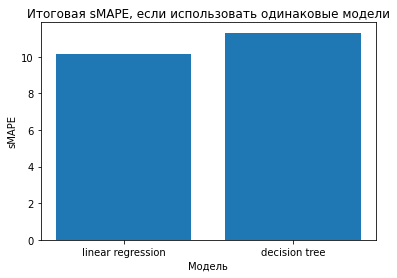

In [111]:
total_viz()

- Если использовать для предсказаний только одинаковые модели, то пока выигрывает модель линейной регрессии.

### Модель случайного леса

Обучим модели случайного леса.

In [112]:
model_rf_rougher = None
model_rf_final = None

model_rf_rougher_depth = None
model_rf_final_depth = None

model_rf_rougher_est = None
model_rf_final_est = None

scores_rf_rougher_mean = 100
scores_rf_rougher_std = None

scores_rf_final_mean = 100
scores_rf_final_std = None

In [113]:
%%time
for est in range(90, 92):
    for depth in range(4, 6):
        model_rougher = RandomForestRegressor(random_state=state, max_depth=depth, n_estimators=est, n_jobs=-1)
        scores_rougher = cross_val_score(model_rougher, features_train_rougher, target_rougher_train, cv=5, scoring=smape_score)
        
        if scores_rougher.mean() < scores_rf_rougher_mean:
            model_rf_rougher = model_rougher
            scores_rf_rougher_mean = scores_rougher.mean()
            scores_rf_rougher_std = scores_rougher.std()
            model_rf_rougher_depth = depth
            model_rf_rougher_est = est
        
print('rougher.output.recovery')
print(f'{abs(scores_rf_rougher_mean):.2f} sMAPE со стандартным отклонением {scores_rf_rougher_std:.2f}')
print(f'Глубина дерева: {model_rf_rougher_depth}')
print(f'Количество деревьев: {model_rf_rougher_est}')

rougher.output.recovery
11.94 sMAPE со стандартным отклонением 3.20
Глубина дерева: 5
Количество деревьев: 91
Wall time: 34.3 s


Проверим важность признаков

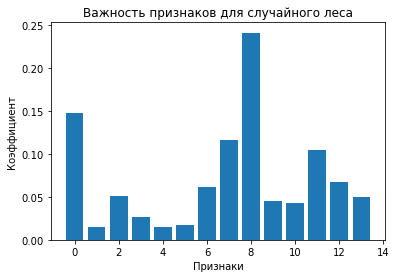

In [114]:
model_rf_rougher_imp = RandomForestRegressor(random_state=state, max_depth=5, n_estimators=91, n_jobs=-1)

model_rf_rougher_imp.fit(features_train_rougher, target_rougher_train)

importance = model_rf_rougher_imp.feature_importances_


plt.bar([x for x in range(len(importance))], importance)
plt.xlabel('Признаки')
plt.ylabel('Коэффициент')
plt.title('Важность признаков для случайного леса')
plt.show()

In [115]:
rougher_train_rf_list = []
for i in range(len(importance)):
    if abs(importance[i]) > 0.05:
        rougher_train_rf_list.append(i)
        
rougher_train_rf_list

[0, 2, 6, 7, 8, 11, 12]

Проверим, изменится ли метрика качества на урезанной выборке

In [116]:
model_fr_rougher_cut = RandomForestRegressor(random_state=state, max_depth=5, n_estimators=91, n_jobs=-1)

scores_rf_r_cut = cross_val_score(model_fr_rougher_cut, features_train_rougher.iloc[:, rougher_train_rf_list] , target_rougher_train, cv=5, scoring=smape_score)
smape_fr_r_cut = scores_rf_r_cut.mean()
print('Только признаки с повышенным влиянием')
print('final.output.recovery')
print(f'{abs(smape_fr_r_cut):.2f} sMAPE со стандартным отклонением {scores_rf_r_cut.std():.2f}')


Только признаки с повышенным влиянием
final.output.recovery
11.19 sMAPE со стандартным отклонением 3.01


Модель стала предсказывать чуть лучше. Проверим модель для финальной эффективности.

In [117]:
%%time
for est in range(62, 63):
    for depth in range(1, 3):
        model_final = RandomForestRegressor(random_state=state, max_depth=depth, n_estimators=est, n_jobs=-1)
        scores_final = cross_val_score(model_final, features_train_final, target_final_train, cv=5, scoring=smape_score)
        
        if scores_final.mean() < scores_rf_final_mean:
            model_rf_final = model_final
            scores_rf_final_mean = scores_final.mean()
            scores_rf_final_std = scores_final.std()
            model_rf_final_depth = depth
            model_rf_final_est = est
        
print('final.output.recovery')
print(f'{abs(scores_rf_final_mean):.2f} sMAPE со стандартным отклонением {scores_rf_final_std:.2f}')
print(f'Глубина дерева: {model_rf_final_depth}')
print(f'Количество деревьев: {model_rf_final_est}')

final.output.recovery
10.80 sMAPE со стандартным отклонением 1.00
Глубина дерева: 1
Количество деревьев: 62
Wall time: 11.7 s


Проверим важность признаков

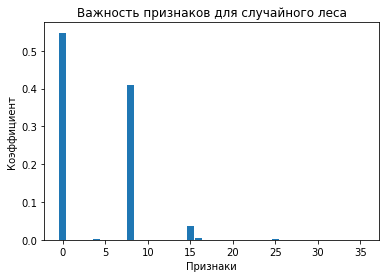

In [118]:
model_rf_final_imp = RandomForestRegressor(random_state=state, max_depth=2, n_estimators=62, n_jobs=-1)

model_rf_final_imp.fit(features_train_final, target_final_train)

importance = model_rf_final_imp.feature_importances_

plt.bar([x for x in range(len(importance))], importance)
plt.xlabel('Признаки')
plt.ylabel('Коэффициент')
plt.title('Важность признаков для случайного леса')
plt.show()

In [119]:
final_train_rf_list = []
for i in range(len(importance)):
    if abs(importance[i]) > 0.005:
        final_train_rf_list.append(i)
        
final_train_rf_list

[0, 8, 15]

Проверим, изменится ли метрика качества на урезанной выборке

In [120]:
model_rf_final_cut = RandomForestRegressor(random_state=state, max_depth=2, n_estimators=62, n_jobs=-1)

scores_rf_f_cut = cross_val_score(model_rf_final_cut, features_train_final.iloc[:, final_train_rf_list] , target_final_train, cv=5, scoring=smape_score)
smape_rf_f_cut = scores_rf_f_cut.mean()
print('Только признаки с повышенным влиянием')
print('final.output.recovery')
print(f'{abs(smape_rf_f_cut):.2f} sMAPE со стандартным отклонением {scores_rf_f_cut.std():.2f}')


Только признаки с повышенным влиянием
final.output.recovery
10.27 sMAPE со стандартным отклонением 0.86


Значения метрики незначительно улучшились

Добавим получившиеся значения метрик в списки для визуализации.

In [121]:
total_smape_rf = -total_smape(scores_rf_rougher_mean, scores_rf_final_mean)

In [122]:
rougher_recovery.append(abs(scores_rf_rougher_mean))
final_recovery.append(abs(smape_rf_f_cut))
list_of_total_smape.append(total_smape_rf)
labels_recovery.append('random forest')

Визуализируем разницу метрик для разных моделей для признака `rougher.output.recovery`.

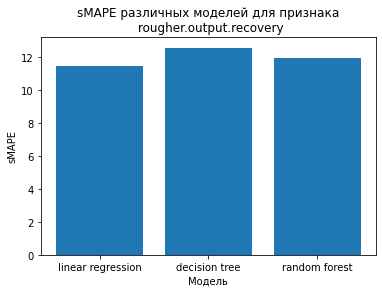

In [123]:
rougher_viz()

- Для целевого признака `rougher.output.recovery` у модели линейной регрессии лучшие значения метрики `sMAPE`.

Визуализируем разницу метрик для разных моделей для признака `final.output.recovery`.

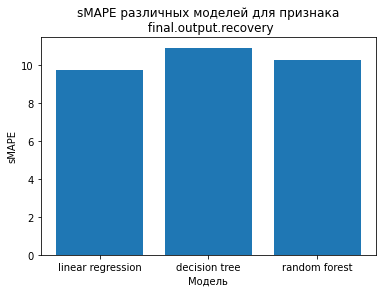

In [124]:
final_viz()

Модель линейной регрессии показывает наиболее низкие значения ошибки.

Визуализируем значения `итоговой sMAPE`, если использовать одинаковые модели.

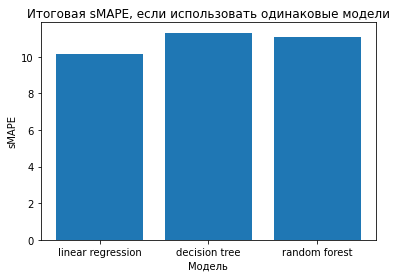

In [125]:
total_viz()

In [126]:
list_of_total_smape

[10.180823891664465, 11.32030029860018, 11.083725200058861]

Если использовать для предсказания одинаковые модели, выигрывает модель линейной регрессии.

Протестируем ее.

### Тестирование

Возьмем модель линейной регрессии и проверим её на тестовой выборке.

Предсказания эффективности восстановления золота после флотации.

In [127]:
scaler_r_test = RobustScaler()
scaler_r_test.fit(features_train_rougher.iloc[:, lasso_rougher_list])
features_train_rougher_norm = scaler_r_test.transform(features_train_rougher.iloc[:, lasso_rougher_list])
features_test_rougher_norm = scaler_r_test.transform(features_test_rougher.iloc[:, lasso_rougher_list])

scaler_f_test = RobustScaler()
scaler_f_test.fit(features_train_final.iloc[:, lasso_final_list])
features_train_final_norm = scaler_f_test.transform(features_train_final.iloc[:, lasso_final_list])
features_test_final_norm = scaler_f_test.transform(features_test_final.iloc[:, lasso_final_list])

sMAPE предсказания эффективности восстановления золота после флотации.

In [128]:
lasso_model_r_cut.fit(features_train_rougher_norm, target_rougher_train)
predict_r = lasso_model_r_cut.predict(features_test_rougher_norm)
smape_r = smape(target_rougher_test, predict_r)
smape_r

8.88453393074768

sMAPE предсказания финальной эффективности восстановления золота.

In [129]:
lasso_model_f_cut.fit(features_train_final_norm, target_final_train)
predict_f = lasso_model_f_cut.predict(features_test_final_norm)
smape_f = smape(target_final_test, predict_f)
smape_f

8.63385619350174

Итоговая sMAPE.

In [130]:
total_smape(smape_r, smape_f)

8.696525627813225

#### Проверка модели на адекватность

Проверим, как справилась бы с этим константная модель.

In [131]:
# эффективность после флотации
dummy_r = DummyRegressor(strategy="mean")
dummy_r.fit(features_train_rougher_norm, target_rougher_train)
dummy_predicted_r = dummy_r.predict(features_test_rougher_norm)
dummy_smape_r = smape(target_rougher_test, dummy_predicted_r)
dummy_smape_r

10.272409705405058

In [132]:
# финальная эффективность
dummy_f = DummyRegressor(strategy="mean")
dummy_f.fit(features_train_final_norm, target_final_train)
dummy_predicted_f = dummy_f.predict(features_test_final_norm)
dummy_smape_f = smape(target_final_test, dummy_predicted_f)
dummy_smape_f

9.743132301242738

In [133]:
total_smape(dummy_smape_r, dummy_smape_f)

9.875451652283319

Наша модель обучилась не очень точно, но предсказывает лучше чем константная.

## Вывод

Данное исследование было посвящено подготовке прототипа модели машинного обучения для «Цифры». Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды и помочь оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками. 

Мы прогнозировали эффективность восстановления после флотации и на финальном этапе. Таким образом, мы разделили имеющиеся у нас обучающие и тестовые выборки в зависимости от целевого признака.

Во время предподготовки данных мы обнаружили, что некоторые данные, похоже, указывали на сбои оборудования - нулевые концентрации веществ после очистки. Поэтому при подготове обучающего набора все некорректные значения были удалены. Так же мы избавились и от мультиколлинеарных значений, связанных с состоянием флотационных установок, которые представляют собой, скорее всего, сообщающиеся сосуды. 

Метрикой качества в данном исследовании нам установили sMAPE - симметричная средняя абсолютная ошибка в процентах, которая, как известно, не очень хорошо показывает себя при нулевых значениях целевых метрик. В обучающем наборе от нулей в целевых метриках мы избавились, убирая из набора некорректные значения в концентрациях, однако в тестовой выборке позволили себе лишь избавиться от пропусков, не занимаясь точечной обработкой данных, и имитируя закрытый ящик с данными.

При многократном обучении трех типов моделей, таких как линейная регрессия, решающее дерево и случайный лес, мы использовали такие приемы, как масштабирование данных и оценка важности признаков, выбирая лучшие показания метрики, чтобы отобрать лучшую модель для финального тестирования. 

В результате модель была отобрана - модель линейной регрессии показала наименьшие значения sMAPE как для эффективности восстановления после флотации, так и на финальном этапе. Для нее мы отобрали только признаки с повышенным влиянием на модель.

**Тестирование модели показало итоговое значение sMAPE 8.7**.
